In [131]:
# ---------------------- Imports ---------------------- #
import pandas as pd
import os

# ---------------------- Configuration ---------------------- #
actual_yields_path = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Output\Dependent\Y_df.csv"

predicted_change_paths = {
    "H1": r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\final_test_predictions_multioutput_H1.csv",
    "H5": r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\final_test_predictions_multioutput_H5.csv",
    "H21": r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\final_test_predictions_multioutput_H21.csv",
    "H63": r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\final_test_predictions_multioutput_H63.csv",
    "H252": r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\final_test_predictions_multioutput_H252.csv"
}

output_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\Reconstructed Yields"
os.makedirs(output_dir, exist_ok=True)

# ---------------------- Load Data ---------------------- #
yields_df = pd.read_csv(actual_yields_path, index_col=0, parse_dates=True)

delta_preds = {
    horizon: pd.read_csv(path, index_col=0, parse_dates=True)
    for horizon, path in predicted_change_paths.items()
}

# ---------------------- Define Maturity Mapping ---------------------- #
maturity_cols = {
    "m1": "US_3m",
    "m2": "US_6m",
    "m3": "US_1y",
    "m4": "US_3y",
    "m5": "US_5y",
    "m6": "US_10y"
}

# ---------------------- Index Map for Trading Days ---------------------- #
idx_map = {ts: i for i, ts in enumerate(yields_df.index)}

# ---------------------- Reconstruct Yields ---------------------- #
reconstructed_yields = {}

for horizon_str, delta_df in delta_preds.items():
    h = int(horizon_str[1:])  # "H1" -> 1
    recon_df = pd.DataFrame(index=delta_df.index)

    for mat_num in range(1, 7):
        mat = f"m{mat_num}"
        col_name = maturity_cols[mat]
        reconstructed = []

        for t in delta_df.index:
            i = idx_map.get(t)
            if i is None or i - h < 0:
                reconstructed.append(None)
                continue

            lagged_y = yields_df.iloc[i - h][col_name]
            delta_y = delta_df.loc[t, f"{mat}_pred"]
            reconstructed.append(lagged_y + delta_y)

        recon_df[f"{mat}_reconstructed"] = reconstructed

    reconstructed_yields[horizon_str] = recon_df

# ---------------------- Save Outputs ---------------------- #
for horizon_str, df in reconstructed_yields.items():
    out_path = os.path.join(output_dir, f"reconstructed_yields_{horizon_str}.csv")
    df.to_csv(out_path)
    print(f"[SAVED] {horizon_str} -> {out_path}")


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\azorb\\PycharmProjects\\Predicting the Yield Curve\\Model Fit\\LSTM\\Output\\LSTM Regression with Technical Indicators\\final_test_predictions_multioutput_H1.csv'

In [133]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os

output_dir = r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\LSTM'

# ---------------------- Plot Settings ---------------------- #
# Use Computer Modern font
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.serif'] = ['Computer Modern']

# ---------------------- Load Data ---------------------- #
# Load reconstructed predictions for H1
reconstructed_h1 = pd.read_csv(
    os.path.join(output_dir, "reconstructed_yields_H1.csv"),
    index_col=0,
    parse_dates=True
)

# Map of maturity keys to actual column names
maturity_cols = {
    "m1": "US_3m",
    "m2": "US_6m",
    "m3": "US_1y",
    "m4": "US_3y",
    "m5": "US_5y",
    "m6": "US_10y"
}

# Align actual yields to the test set of H1
aligned_actual = yields_df.loc[reconstructed_h1.index]

# ---------------------- Plot ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

mpl.rcParams['font.family'] = 'cmr10'  # Use Computer Modern Roman
mpl.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern for math text too

for i, (mat_key, col_name) in enumerate(maturity_cols.items()):
    ax = axes[i]
    ax.plot(aligned_actual.index, aligned_actual[col_name], label="Actual", color="blue")
    ax.plot(reconstructed_h1.index, reconstructed_h1[f"{mat_key}_reconstructed"], label="Forecast", color="red", linestyle="--")
    ax.set_title(f"{col_name}", fontsize=12)
    ax.grid(True)

# Add a single legend outside the subplots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, fontsize=12)

fig.suptitle("Yield Forecast vs Actual (H1 Test Set)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\azorb\\PycharmProjects\\Predicting the Yield Curve\\Model Fit\\Output\\LSTM\\reconstructed_yields_H1.csv'

C:\Users\azorb\AppData\Local\Temp\ipykernel_219272\3668287981.py:21: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)


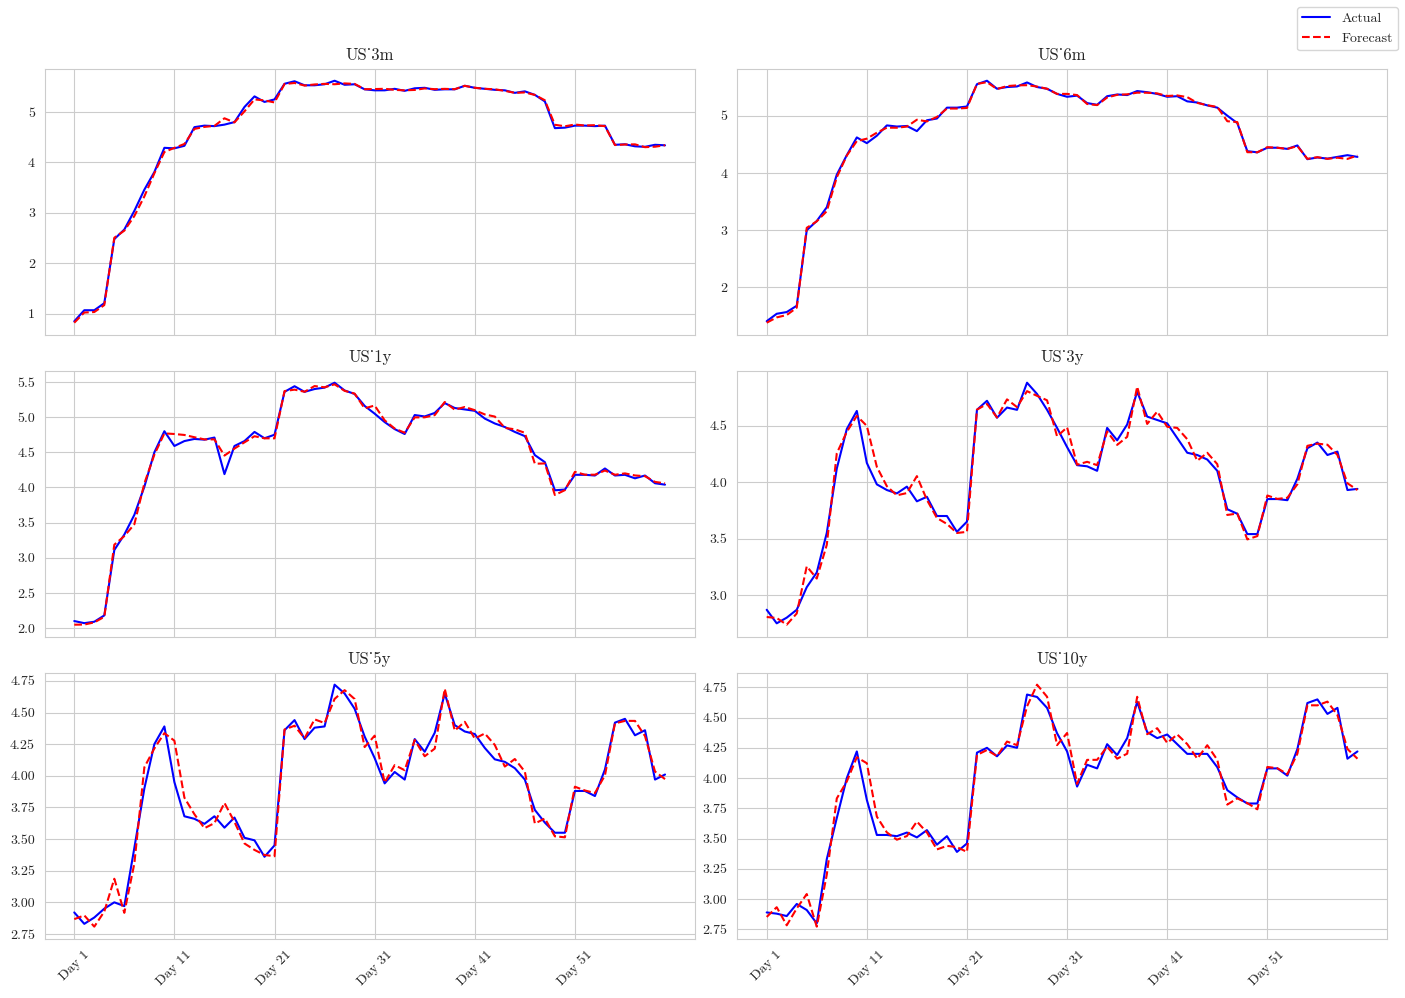

In [10]:
import numpy as np

# ---------------------- Load Reconstructed H1 ---------------------- #
reconstructed_h1 = pd.read_csv(
    r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\Reconstructed Yields\reconstructed_yields_H1.csv",
    index_col=0, parse_dates=True
)

# ---------------------- Align Actual Yields to H1 ---------------------- #
aligned_actual_h1 = yields_df.loc[reconstructed_h1.index]

# ---------------------- Sample 60 Random Trading Days ---------------------- #
np.random.seed(5)  # Optional: for reproducibility
sampled_dates_h1 = np.random.choice(reconstructed_h1.index, size=60, replace=False)
sampled_dates_h1.sort()

sampled_actual_h1 = aligned_actual_h1.loc[sampled_dates_h1]
sampled_forecast_h1 = reconstructed_h1.loc[sampled_dates_h1]

# ---------------------- Plot H1 Forecast vs Actual ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

# Generate Day labels: Day 1 to Day 60
x_labels = [f"Day {i+1}" for i in range(len(sampled_dates_h1))]
x_ticks = np.arange(len(sampled_dates_h1))  # Integer positions

for i, (mat_key, col_name) in enumerate(maturity_cols.items()):
    ax = axes[i]
    ax.plot(x_ticks, sampled_actual_h1[col_name].values, color="blue", label="Actual")
    ax.plot(x_ticks, sampled_forecast_h1[f"{mat_key}_reconstructed"].values, color="red", linestyle="--", label="Forecast")
    ax.set_title(f"{col_name}")
    ax.set_xticks(x_ticks[::10])  # Show every 10th tick
    ax.set_xticklabels(x_labels[::10], rotation=45)
    ax.grid(True)

# One global legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

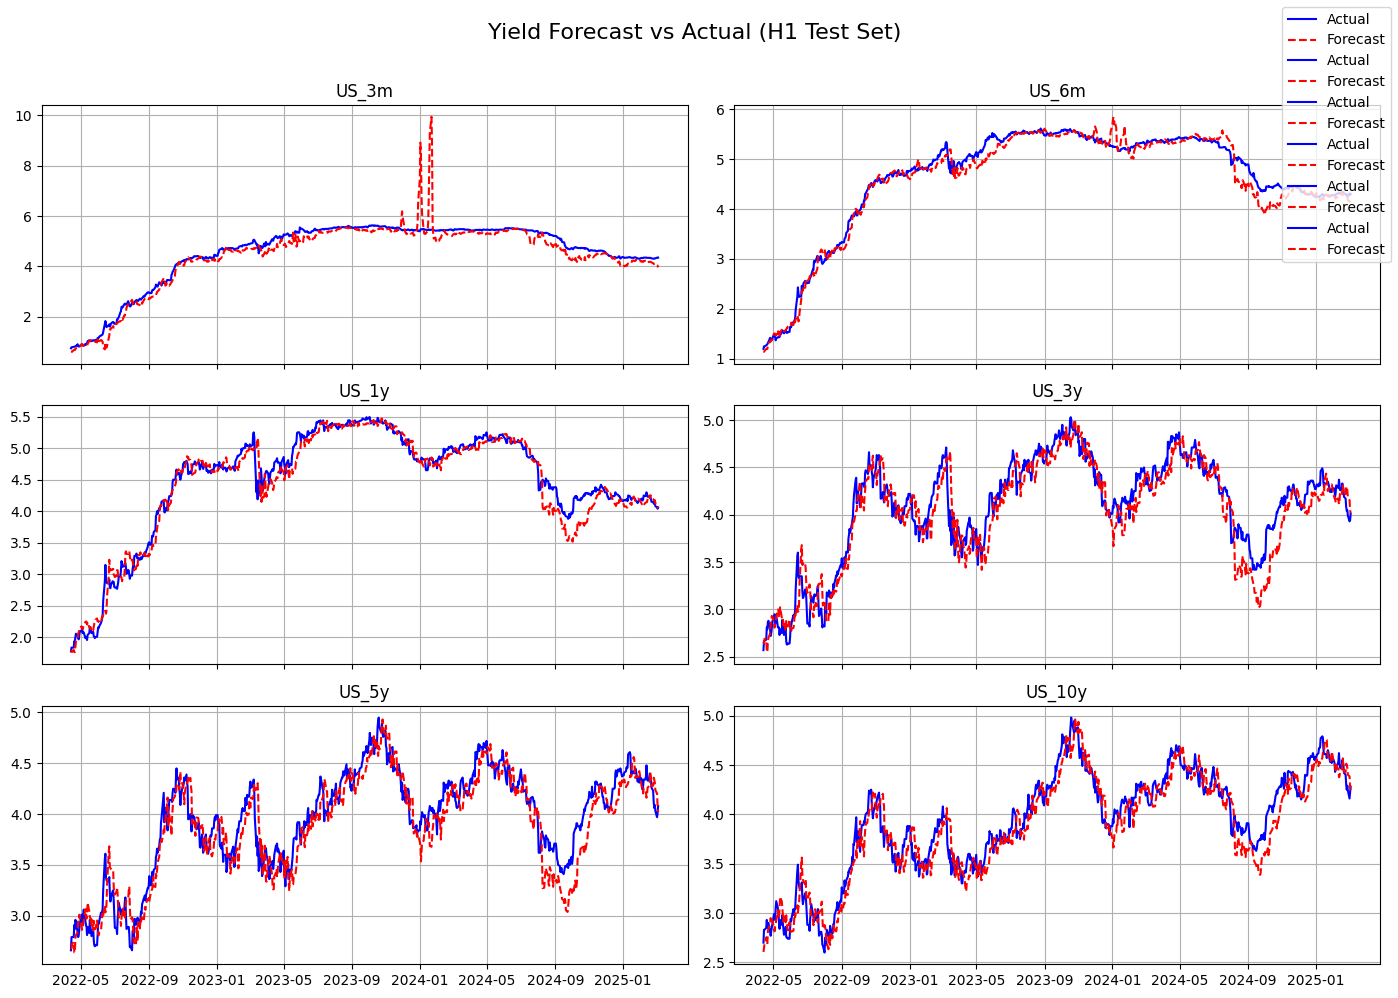

In [16]:
import matplotlib.pyplot as plt

# Load reconstructed predictions for H1
reconstructed_h1 = pd.read_csv(os.path.join(output_dir, f"reconstructed_yields_H5.csv"), index_col=0, parse_dates=True)

# Map of maturity keys to actual column names
maturity_cols = {
    "m1": "US_3m",
    "m2": "US_6m",
    "m3": "US_1y",
    "m4": "US_3y",
    "m5": "US_5y",
    "m6": "US_10y"
}

# Align actual yields to the test set of H1
aligned_actual = yields_df.loc[reconstructed_h1.index]

# Plot
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, (mat_key, col_name) in enumerate(maturity_cols.items()):
    ax = axes[i]
    ax.plot(aligned_actual.index, aligned_actual[col_name], label="Actual", color="blue")
    ax.plot(reconstructed_h1.index, reconstructed_h1[f"{mat_key}_reconstructed"], label="Forecast", color="red", linestyle="--")
    ax.set_title(f"{col_name}")
    ax.grid(True)

fig.suptitle("Yield Forecast vs Actual (H1 Test Set)", fontsize=16)
fig.legend(loc="upper right")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

C:\Users\azorb\AppData\Local\Temp\ipykernel_310996\2916763853.py:19: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)


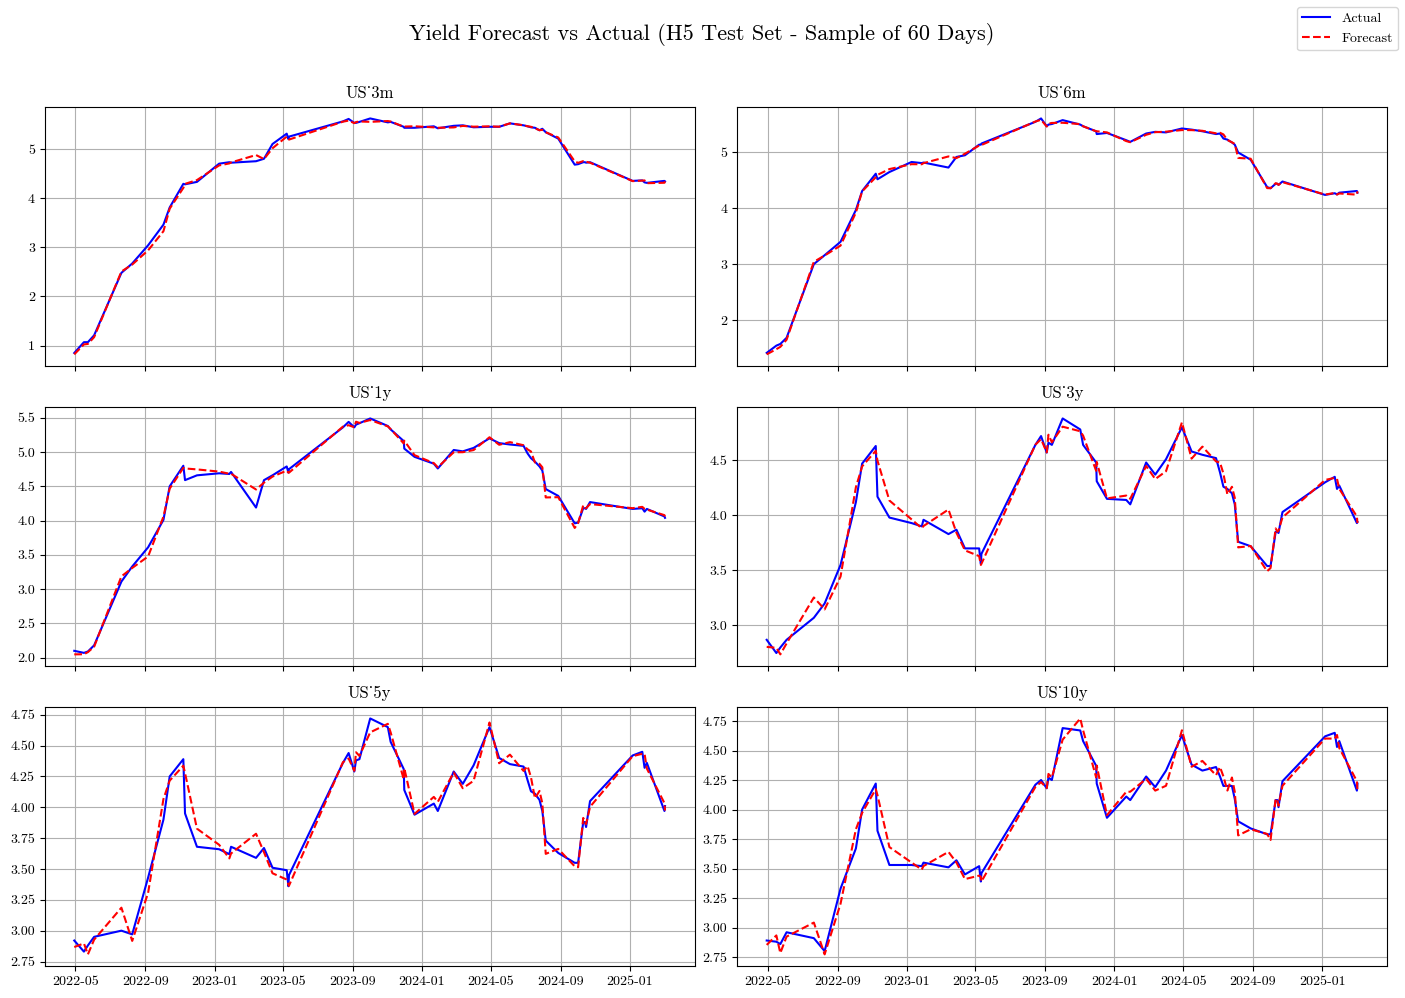

In [44]:
# ---------------------- Load Reconstructed H5 ---------------------- #
reconstructed_h5 = pd.read_csv(
    r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\Reconstructed Yields\reconstructed_yields_H1.csv",
    index_col=0, parse_dates=True
)

# ---------------------- Align Actual Yields to H5 ---------------------- #
aligned_actual_h5 = yields_df.loc[reconstructed_h5.index]

# ---------------------- Sample 60 Random Trading Days ---------------------- #
np.random.seed(5)  # Optional: for reproducibility
sampled_dates_h5 = np.random.choice(reconstructed_h5.index, size=60, replace=False)
sampled_dates_h5.sort()

sampled_actual_h5 = aligned_actual_h5.loc[sampled_dates_h5]
sampled_forecast_h5 = reconstructed_h5.loc[sampled_dates_h5]

# ---------------------- Plot H5 Forecast vs Actual ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, (mat_key, col_name) in enumerate(maturity_cols.items()):
    ax = axes[i]
    ax.plot(sampled_actual_h5.index, sampled_actual_h5[col_name], color="blue", label="Actual")
    ax.plot(sampled_forecast_h5.index, sampled_forecast_h5[f"{mat_key}_reconstructed"], color="red", linestyle="--", label="Forecast")
    ax.set_title(f"{col_name}")
    ax.grid(True)

# One global legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=10)

fig.suptitle("Yield Forecast vs Actual (H5 Test Set - Sample of 60 Days)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

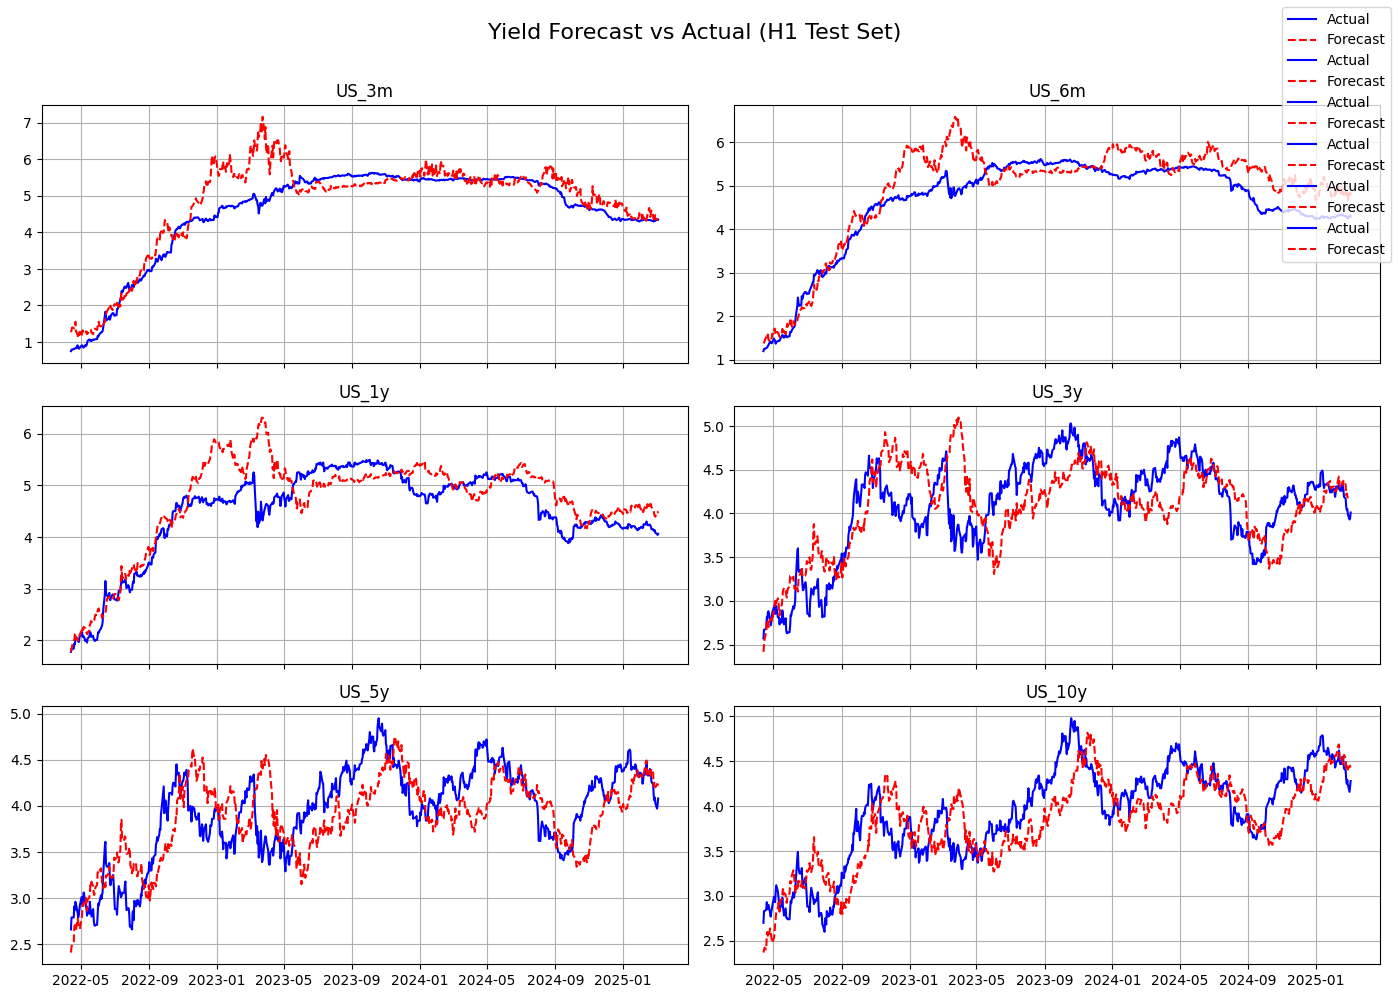

In [21]:
import matplotlib.pyplot as plt

# Load reconstructed predictions for H1
reconstructed_h1 = pd.read_csv(os.path.join(output_dir, f"reconstructed_yields_H21.csv"), index_col=0, parse_dates=True)

# Map of maturity keys to actual column names
maturity_cols = {
    "m1": "US_3m",
    "m2": "US_6m",
    "m3": "US_1y",
    "m4": "US_3y",
    "m5": "US_5y",
    "m6": "US_10y"
}

# Align actual yields to the test set of H1
aligned_actual = yields_df.loc[reconstructed_h1.index]

# Plot
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, (mat_key, col_name) in enumerate(maturity_cols.items()):
    ax = axes[i]
    ax.plot(aligned_actual.index, aligned_actual[col_name], label="Actual", color="blue")
    ax.plot(reconstructed_h1.index, reconstructed_h1[f"{mat_key}_reconstructed"], label="Forecast", color="red", linestyle="--")
    ax.set_title(f"{col_name}")
    ax.grid(True)

fig.suptitle("Yield Forecast vs Actual (H1 Test Set)", fontsize=16)
fig.legend(loc="upper right")
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

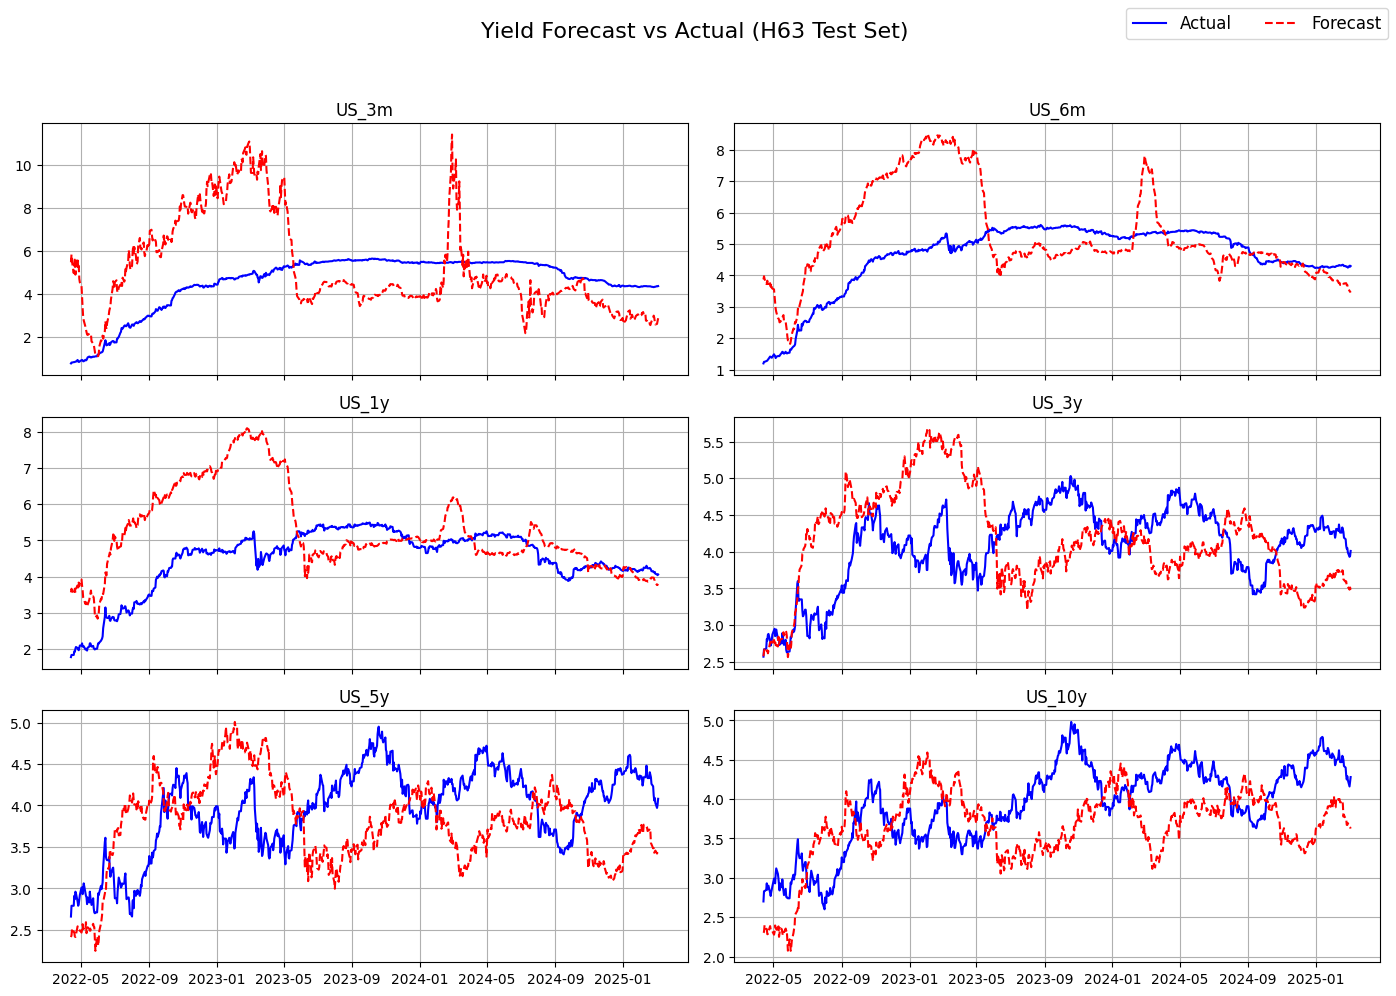

In [56]:
# ---------------------- Imports ---------------------- #
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os

# ---------------------- Config ---------------------- #
HORIZON = 63  # Change this to 5, 21, 63, 252, etc.
output_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\Reconstructed Yields"

# ---------------------- Plot Settings ---------------------- #
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.serif'] = ['Computer Modern']

# ---------------------- Load Data ---------------------- #
reconstructed = pd.read_csv(
    os.path.join(output_dir, f"reconstructed_yields_H{HORIZON}.csv"),
    index_col=0,
    parse_dates=True
)

# Maturity label mapping
maturity_cols = {
    "m1": "US_3m",
    "m2": "US_6m",
    "m3": "US_1y",
    "m4": "US_3y",
    "m5": "US_5y",
    "m6": "US_10y"
}

# Align actual yields to reconstructed forecast horizon index
aligned_actual = yields_df.loc[reconstructed.index]

# ---------------------- Plot ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, (mat_key, col_name) in enumerate(maturity_cols.items()):
    ax = axes[i]
    ax.plot(aligned_actual.index, aligned_actual[col_name], label="Actual", color="blue")
    ax.plot(reconstructed.index, reconstructed[f"{mat_key}_reconstructed"], label="Forecast", color="red", linestyle="--")
    ax.set_title(f"{col_name}", fontsize=12)
    ax.grid(True)

# Add a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, fontsize=12)

fig.suptitle(f"Yield Forecast vs Actual (H{HORIZON} Test Set)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

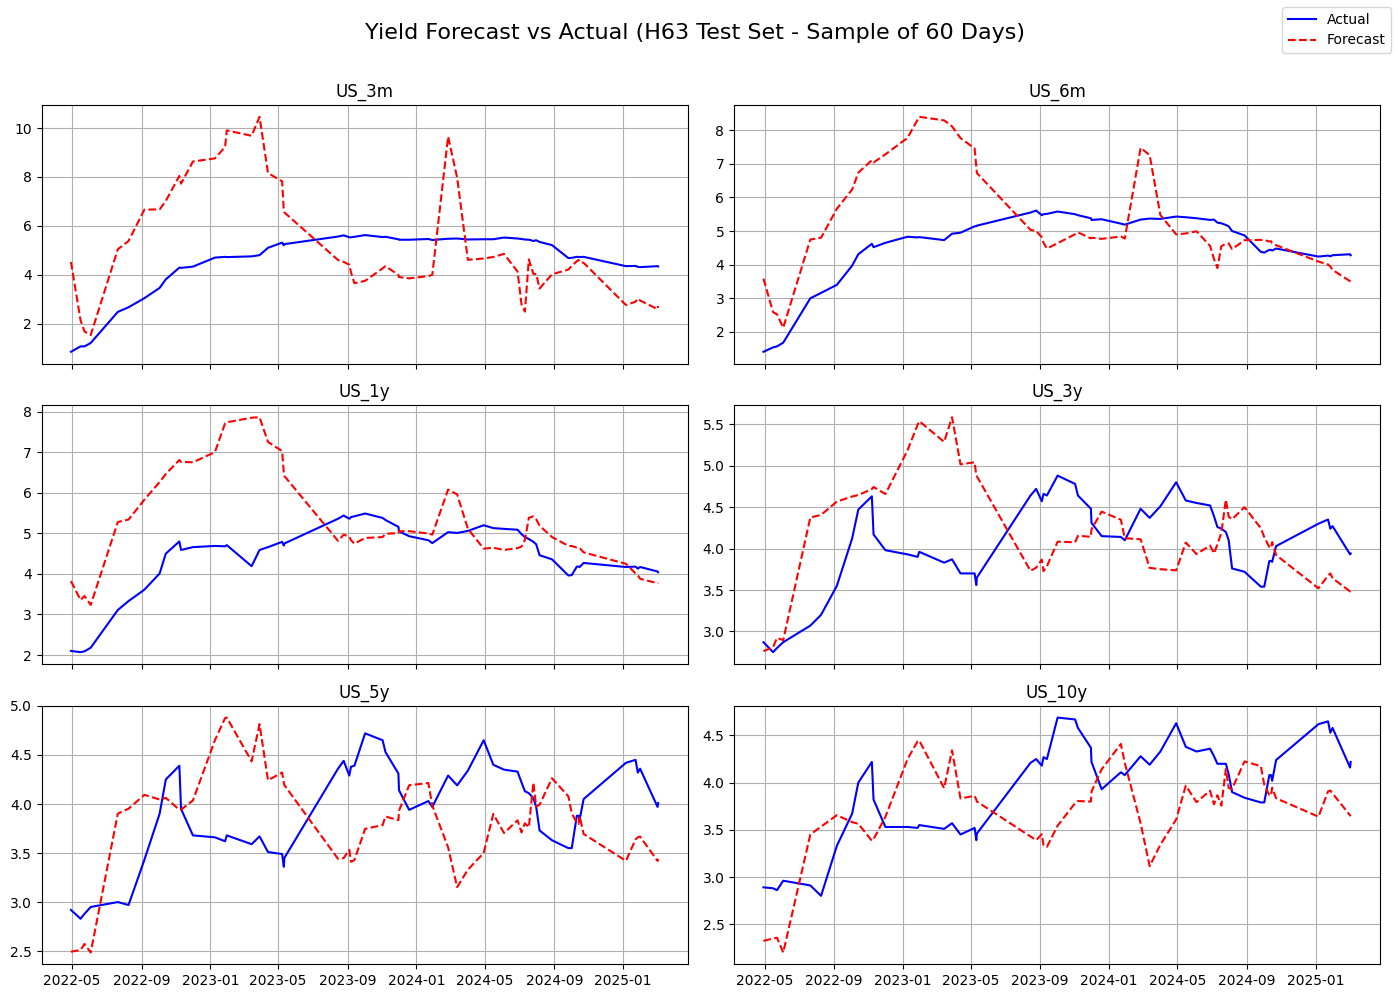

In [55]:
# ---------------------- Imports ---------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- Config ---------------------- #
HORIZON = 63  # change to 1, 5, 21, 63, 252, etc.

# ---------------------- Maturity Mapping ---------------------- #
maturity_cols = {
    "m1": "US_3m",
    "m2": "US_6m",
    "m3": "US_1y",
    "m4": "US_3y",
    "m5": "US_5y",
    "m6": "US_10y"
}

# ---------------------- File Paths ---------------------- #
forecast_path = fr"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\Reconstructed Yields\reconstructed_yields_H{HORIZON}.csv"

# ---------------------- Load Forecast & Actuals ---------------------- #
reconstructed = pd.read_csv(forecast_path, index_col=0, parse_dates=True)
aligned_actual = yields_df.loc[reconstructed.index]

# ---------------------- Sample 60 Random Trading Days ---------------------- #
np.random.seed(5)
sampled_dates = np.random.choice(reconstructed.index, size=60, replace=False)
sampled_dates.sort()

sampled_actual = aligned_actual.loc[sampled_dates]
sampled_forecast = reconstructed.loc[sampled_dates]

# ---------------------- Plot Forecast vs Actual ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, (mat_key, col_name) in enumerate(maturity_cols.items()):
    ax = axes[i]
    ax.plot(sampled_actual.index, sampled_actual[col_name], color="blue", label="Actual")
    ax.plot(sampled_forecast.index, sampled_forecast[f"{mat_key}_reconstructed"], color="red", linestyle="--", label="Forecast")
    ax.set_title(f"{col_name}")
    ax.grid(True)

# One global legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=10)

fig.suptitle(f"Yield Forecast vs Actual (H{HORIZON} Test Set - Sample of 60 Days)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

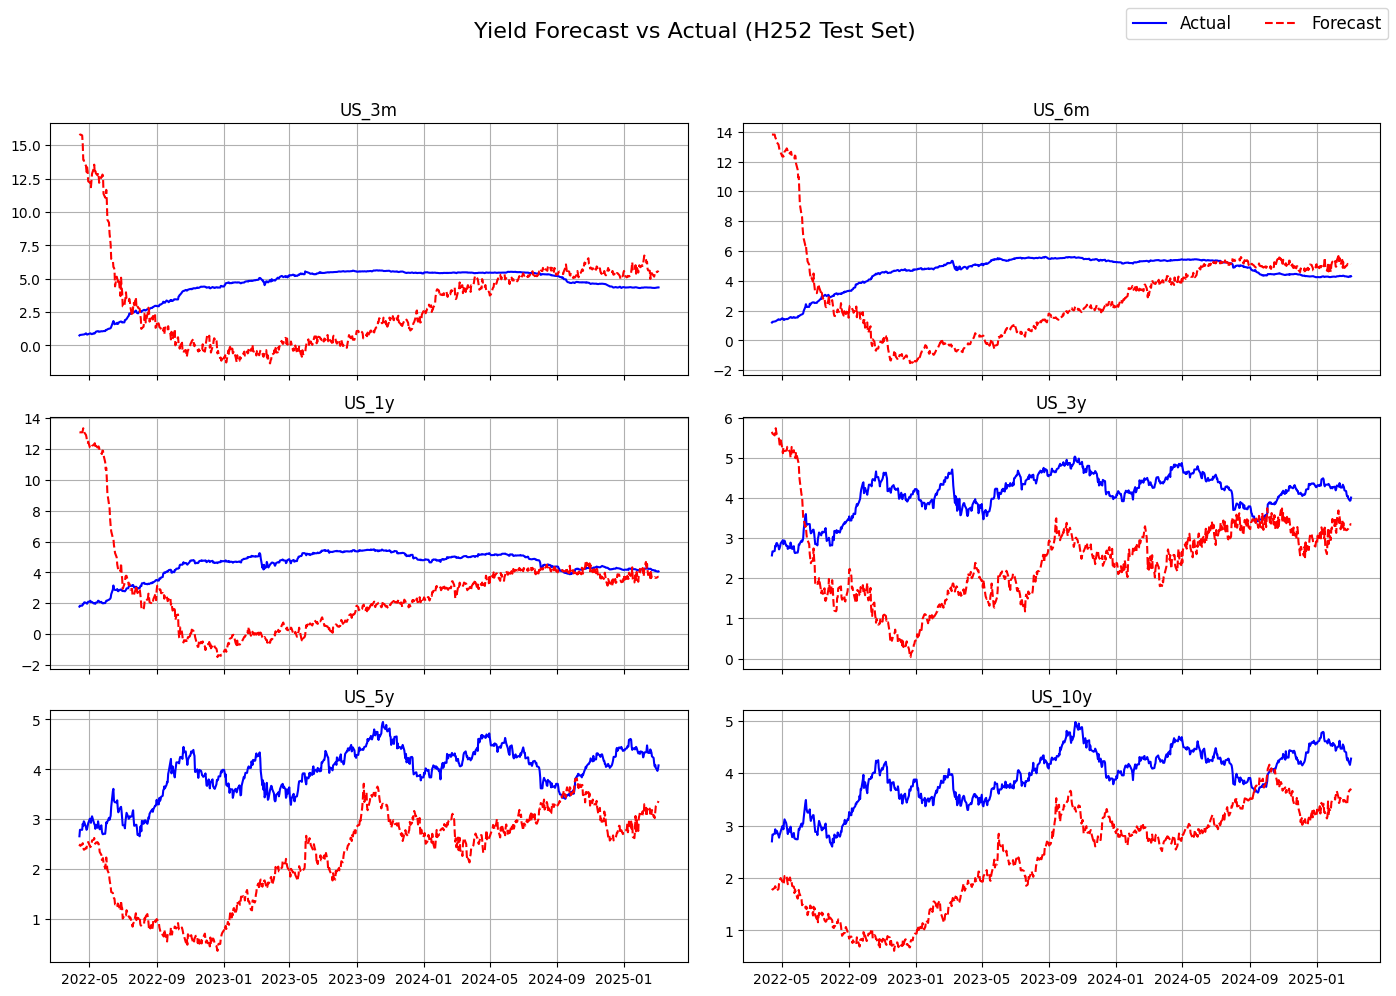

In [57]:
# ---------------------- Imports ---------------------- #
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import os

# ---------------------- Config ---------------------- #
HORIZON = 252  # Change this to 5, 21, 63, 252, etc.
output_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\Reconstructed Yields"

# ---------------------- Plot Settings ---------------------- #
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['font.serif'] = ['Computer Modern']

# ---------------------- Load Data ---------------------- #
reconstructed = pd.read_csv(
    os.path.join(output_dir, f"reconstructed_yields_H{HORIZON}.csv"),
    index_col=0,
    parse_dates=True
)

# Maturity label mapping
maturity_cols = {
    "m1": "US_3m",
    "m2": "US_6m",
    "m3": "US_1y",
    "m4": "US_3y",
    "m5": "US_5y",
    "m6": "US_10y"
}

# Align actual yields to reconstructed forecast horizon index
aligned_actual = yields_df.loc[reconstructed.index]

# ---------------------- Plot ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, (mat_key, col_name) in enumerate(maturity_cols.items()):
    ax = axes[i]
    ax.plot(aligned_actual.index, aligned_actual[col_name], label="Actual", color="blue")
    ax.plot(reconstructed.index, reconstructed[f"{mat_key}_reconstructed"], label="Forecast", color="red", linestyle="--")
    ax.set_title(f"{col_name}", fontsize=12)
    ax.grid(True)

# Add a single legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=2, fontsize=12)

fig.suptitle(f"Yield Forecast vs Actual (H{HORIZON} Test Set)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

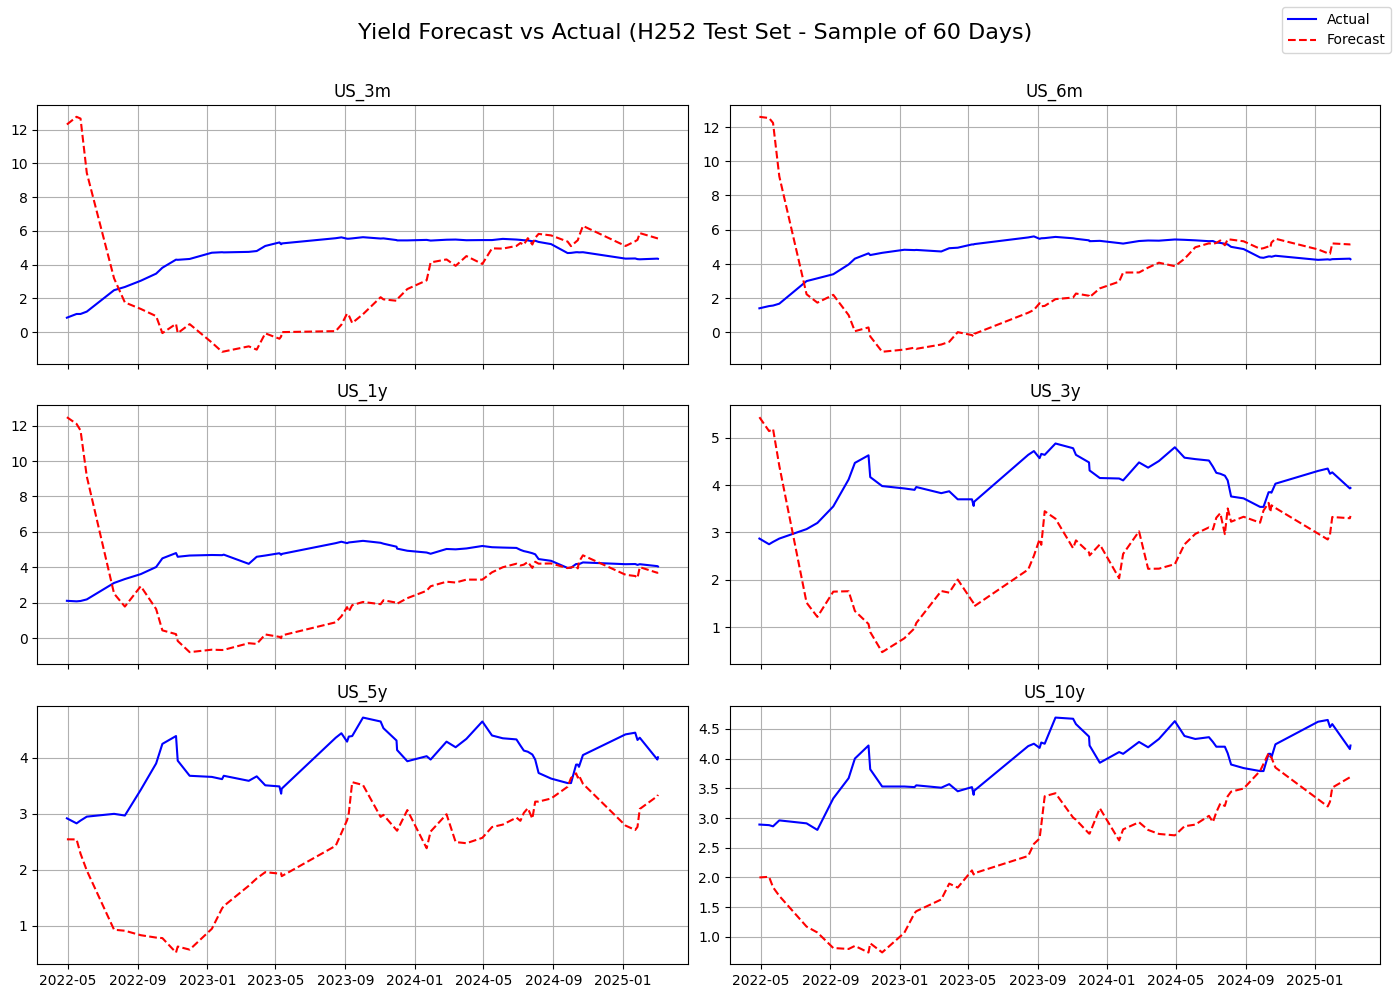

In [58]:
# ---------------------- Imports ---------------------- #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- Config ---------------------- #
HORIZON = 252  # change to 1, 5, 21, 63, 252, etc.

# ---------------------- Maturity Mapping ---------------------- #
maturity_cols = {
    "m1": "US_3m",
    "m2": "US_6m",
    "m3": "US_1y",
    "m4": "US_3y",
    "m5": "US_5y",
    "m6": "US_10y"
}

# ---------------------- File Paths ---------------------- #
forecast_path = fr"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\Reconstructed Yields\reconstructed_yields_H{HORIZON}.csv"

# ---------------------- Load Forecast & Actuals ---------------------- #
reconstructed = pd.read_csv(forecast_path, index_col=0, parse_dates=True)
aligned_actual = yields_df.loc[reconstructed.index]

# ---------------------- Sample 60 Random Trading Days ---------------------- #
np.random.seed(5)
sampled_dates = np.random.choice(reconstructed.index, size=60, replace=False)
sampled_dates.sort()

sampled_actual = aligned_actual.loc[sampled_dates]
sampled_forecast = reconstructed.loc[sampled_dates]

# ---------------------- Plot Forecast vs Actual ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, (mat_key, col_name) in enumerate(maturity_cols.items()):
    ax = axes[i]
    ax.plot(sampled_actual.index, sampled_actual[col_name], color="blue", label="Actual")
    ax.plot(sampled_forecast.index, sampled_forecast[f"{mat_key}_reconstructed"], color="red", linestyle="--", label="Forecast")
    ax.set_title(f"{col_name}")
    ax.grid(True)

# One global legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=10)

fig.suptitle(f"Yield Forecast vs Actual (H{HORIZON} Test Set - Sample of 60 Days)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

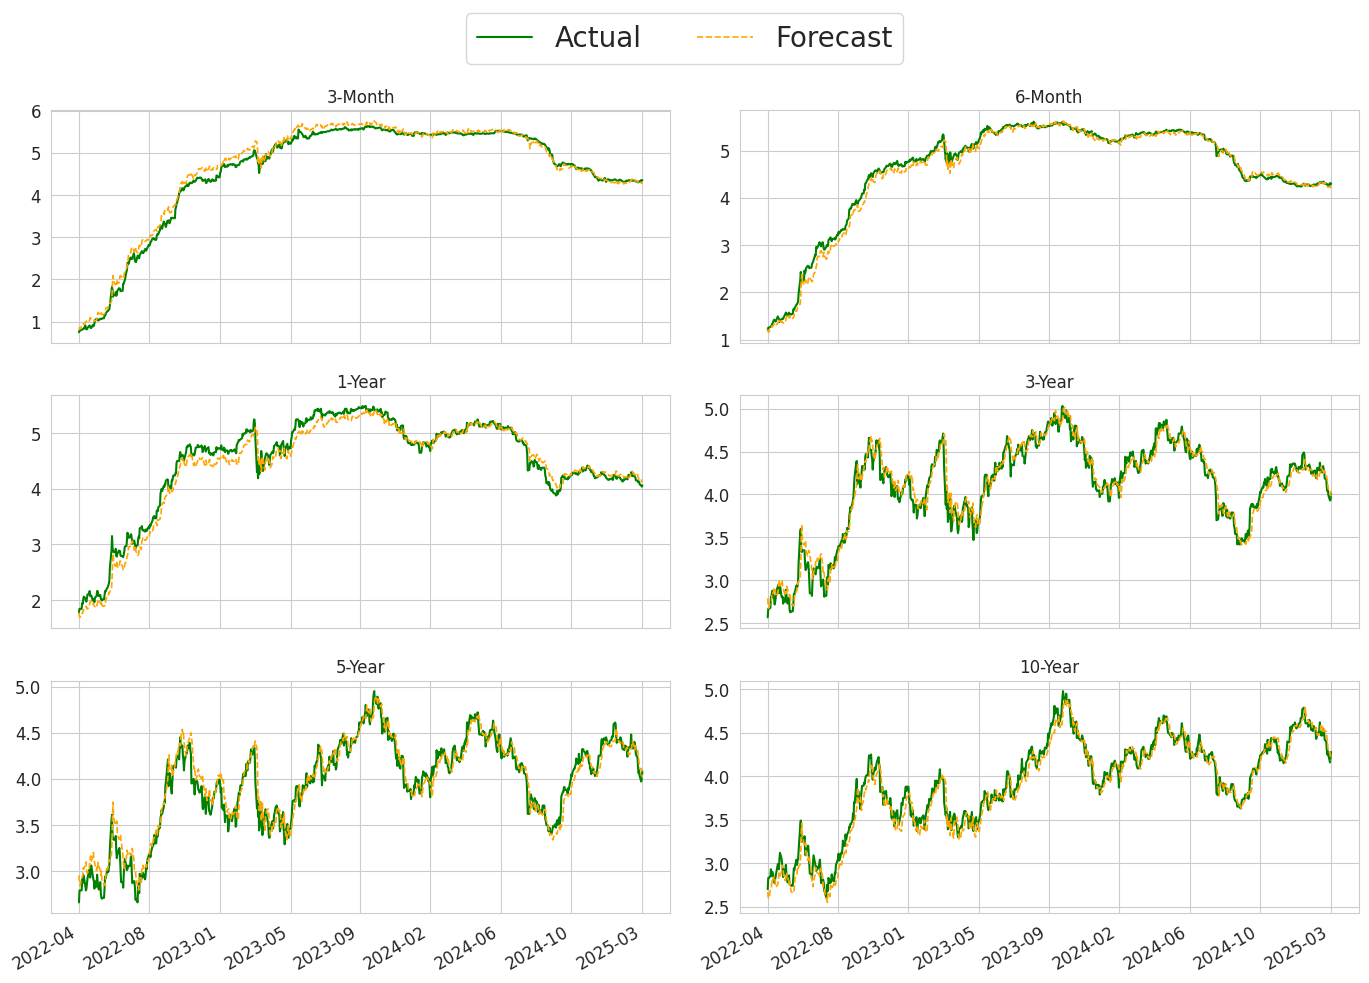

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

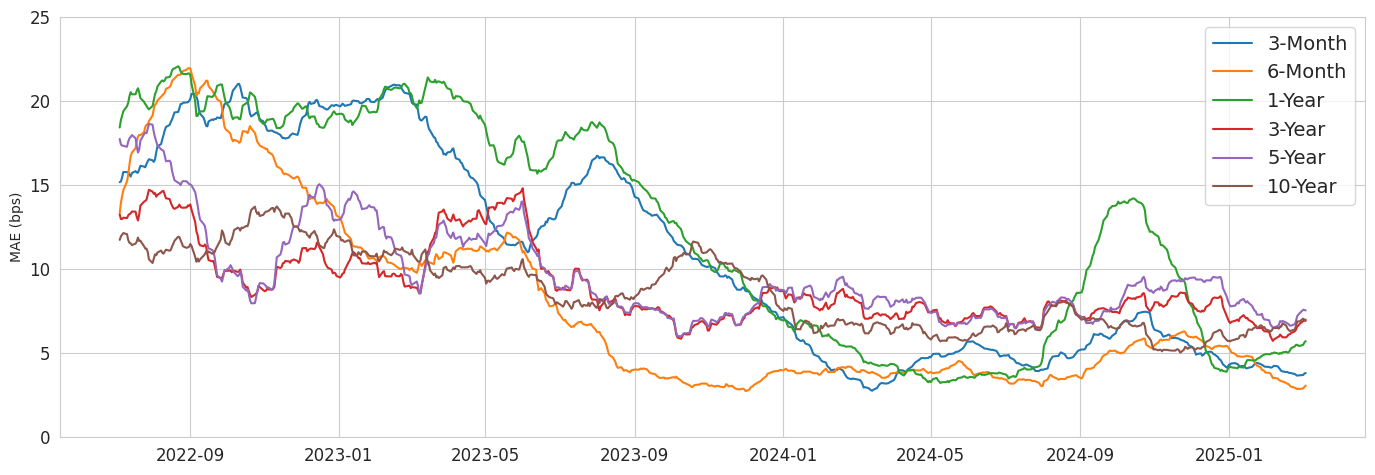

In [140]:
# ---------------------- Imports ---------------------- #
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ---------------------- Config ---------------------- #
data_dir     = r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\DNS_KF'
results_path = os.path.join(data_dir, "dns_kf_h1_fixed_window_results.csv")

# map your columns to nice names
maturity_cols = {
    "US_3m":  "3-Month",
    "US_6m":  "6-Month",
    "US_1y":  "1-Year",
    "US_3y":  "3-Year",
    "US_5y":  "5-Year",
    "US_10y": "10-Year"
}
keys = list(maturity_cols.keys())
names = [maturity_cols[k] for k in keys]

# ---------------------- Load & Parse Data ---------------------- #
df = (
    pd.read_csv(results_path, parse_dates=["eval_date"])
      .query("horizon == 1")    # only H=1
      .set_index("eval_date")
)
df["true_yields"]     = df["true_yields"].apply(ast.literal_eval)
df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)

true_df = pd.DataFrame(df["true_yields"].tolist(),    index=df.index, columns=keys)
pred_df = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)

true_df.rename(columns=maturity_cols, inplace=True)
pred_df.rename(columns=maturity_cols, inplace=True)

# align
common_cols = true_df.columns.intersection(pred_df.columns)
true_df, pred_df = (
    true_df[common_cols].align(pred_df[common_cols], join="inner", axis=0)
)

# ---------------------- Prepare 9 Date Ticks ---------------------- #
all_dates   = true_df.index
loc_indices = np.linspace(0, len(all_dates)-1, 9, dtype=int)
tick_dates  = all_dates[loc_indices]
tick_labels = [d.strftime('%Y-%m') for d in tick_dates]

# ---------------------- Plot Actual vs Forecast ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, mat in enumerate(common_cols):
    ax = axes[i]
    ax.plot(true_df.index,  true_df[mat],
            color="green", linestyle="-", linewidth=1.5, label="Actual")
    ax.plot(pred_df.index,  pred_df[mat],
            color="orange", linestyle="--", linewidth=1.2, label="Forecast")
    ax.set_title(mat, fontsize=12)
    ax.grid(True)

    # force exactly 9 ticks
    ax.set_xticks(tick_dates)
    ax.set_xticklabels(tick_labels, rotation=30, ha='right')

# shared legend on top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.93])

# ---------------------- Compute Rolling Window MAE in bps ---------------------- #
window_size     = 60
mae_df          = (true_df - pred_df).abs()
rolling_mae_bps = mae_df.rolling(window=window_size).mean() * 100  # in basis points

# ---------------------- Plot Rolling MAE ---------------------- #
fig2, ax2 = plt.subplots(figsize=(14, 5))
for mat in common_cols:
    ax2.plot(rolling_mae_bps.index, rolling_mae_bps[mat], label=mat)

ax2.set_ylabel("MAE (bps)")
ax2.set_ylim(0, 25)
ax2.grid(True)
ax2.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

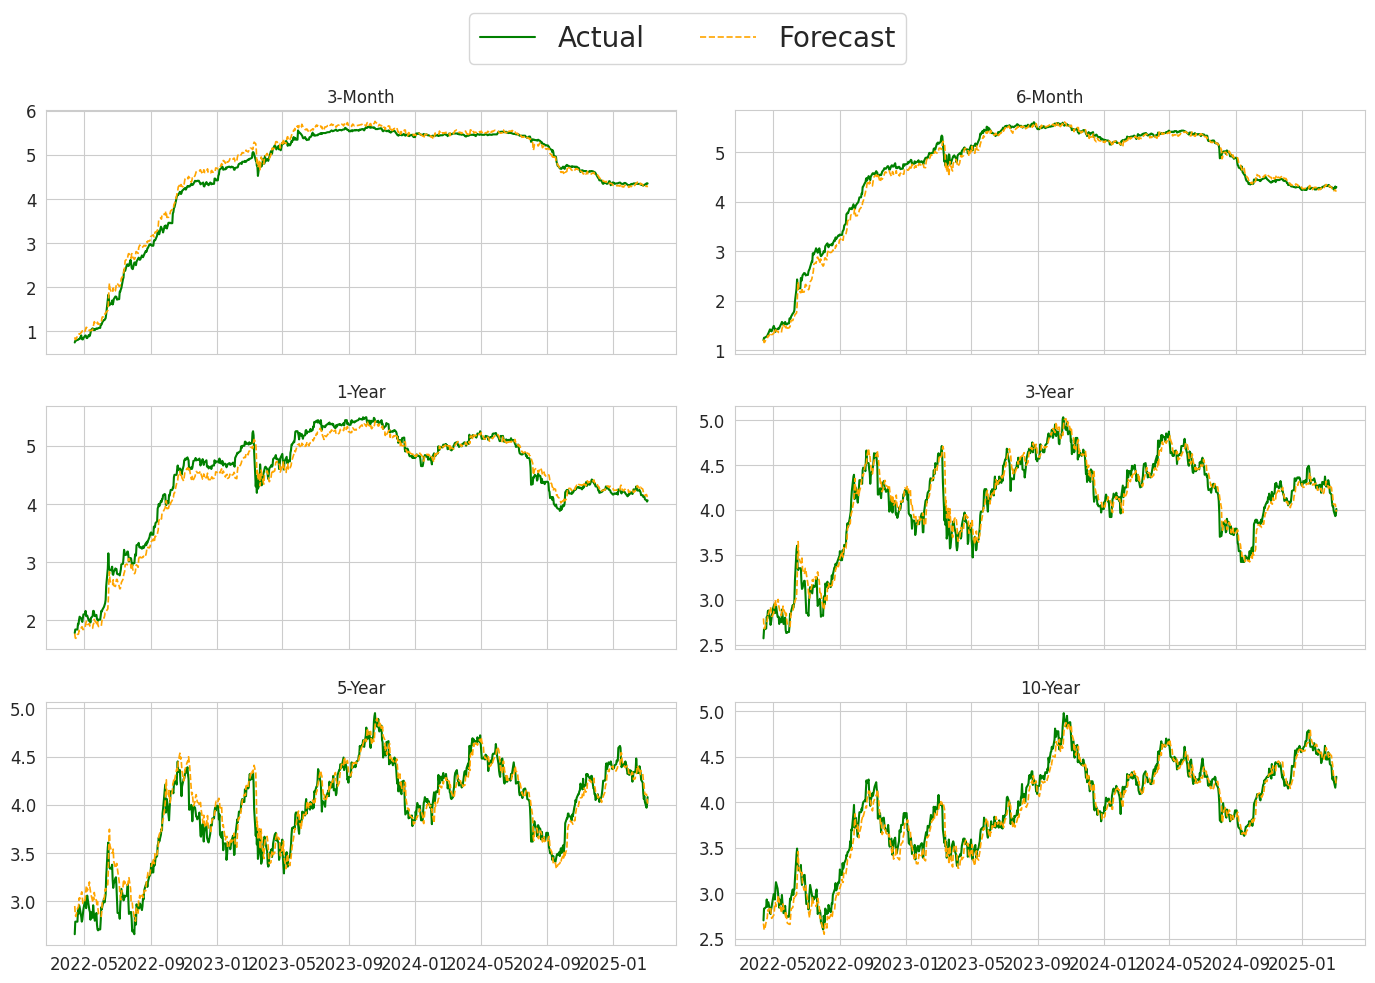

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

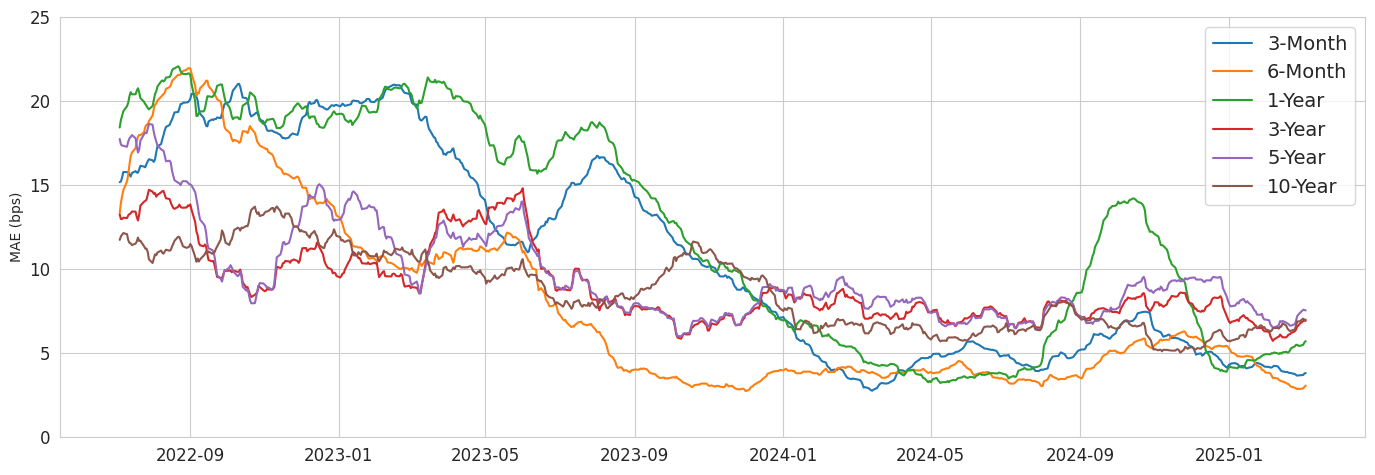

In [134]:
# ---------------------- Imports ---------------------- #
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------- Config ---------------------- #
data_dir     = r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\DNS_KF'
results_path = os.path.join(data_dir, "dns_kf_h1_fixed_window_results.csv")

# map your columns to nice names
maturity_cols = {
    "US_3m":  "3-Month",
    "US_6m":  "6-Month",
    "US_1y":  "1-Year",
    "US_3y":  "3-Year",
    "US_5y":  "5-Year",
    "US_10y": "10-Year"
}
keys = list(maturity_cols.keys())
names = [maturity_cols[k] for k in keys]

# ---------------------- Load & Parse Data ---------------------- #
df = (
    pd.read_csv(results_path, parse_dates=["eval_date"])
      .query("horizon == 1")    # only H=1
      .set_index("eval_date")
)
df["true_yields"]    = df["true_yields"].apply(ast.literal_eval)
df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)

true_df = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
pred_df = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)

true_df.rename(columns=maturity_cols, inplace=True)
pred_df.rename(columns=maturity_cols, inplace=True)

# align
common_cols = true_df.columns.intersection(pred_df.columns)
true_df, pred_df = (
    true_df[common_cols].align(pred_df[common_cols], join="inner", axis=0)
)

# ---------------------- Plot Actual vs Forecast ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, mat in enumerate(common_cols):
    ax = axes[i]
    ax.plot(true_df.index,  true_df[mat],
            color="green", linestyle="-", linewidth=1.5, label="Actual")
    ax.plot(pred_df.index,  pred_df[mat],
            color="orange", linestyle="--", linewidth=1.2, label="Forecast")
    ax.set_title(mat, fontsize=12)
    ax.grid(True)

# shared legend on top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.93])

# ---------------------- Compute Rolling Window MAE in bps ---------------------- #
window_size    = 60
mae_df         = (true_df - pred_df).abs()
rolling_mae_bps = mae_df.rolling(window=window_size).mean() * 100  # in basis points

# ---------------------- Plot Rolling MAE ---------------------- #
fig2, ax2 = plt.subplots(figsize=(14, 5))
for mat in common_cols:
    ax2.plot(rolling_mae_bps.index, rolling_mae_bps[mat], label=mat)

ax2.set_ylabel("MAE (bps)")
ax2.set_ylim(0, 25)
ax2.grid(True)
ax2.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.show()


findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

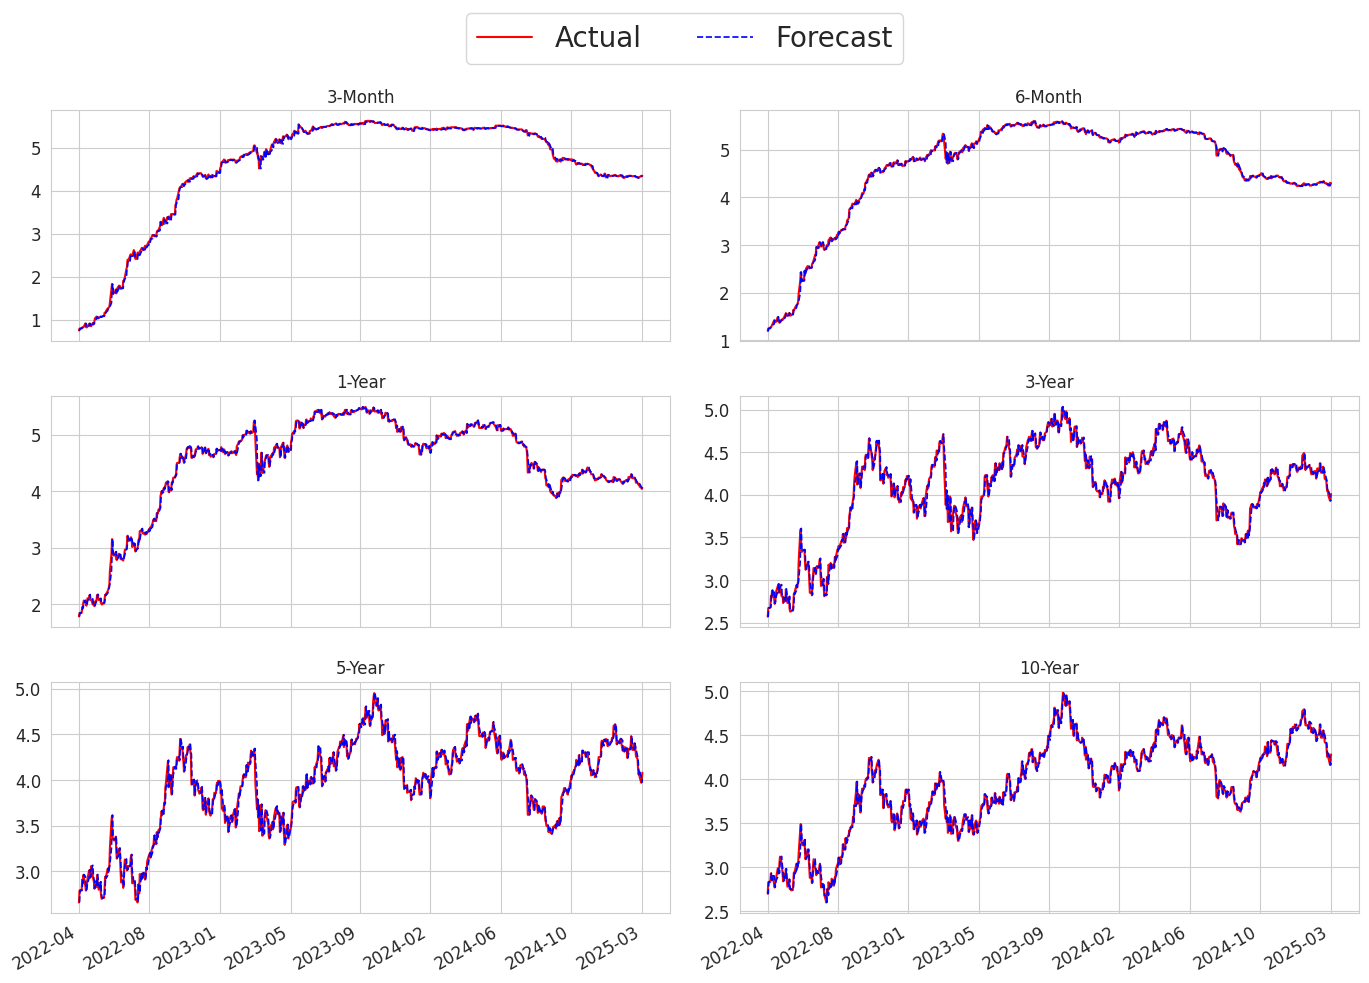

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

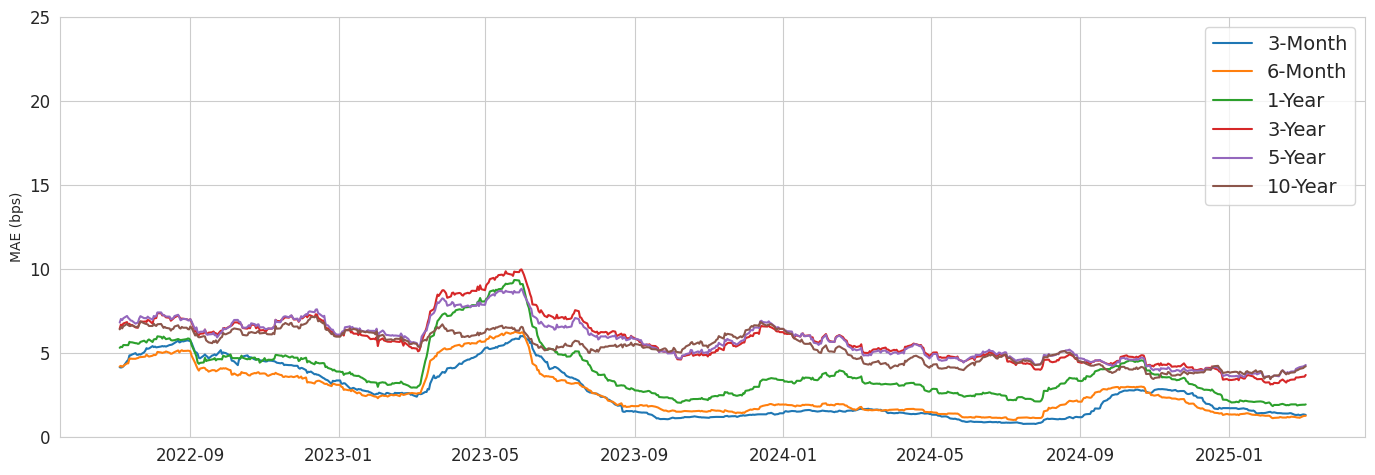

In [138]:
# ---------------------- Imports ---------------------- #
import os
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ---------------------- Config ---------------------- #
data_dir     = r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\LSTM'
results_path = os.path.join(data_dir, "lstm_h1_fixed_window_results.csv")

# map your columns to nice names
maturity_cols = {
    "US_3m":  "3-Month",
    "US_6m":  "6-Month",
    "US_1y":  "1-Year",
    "US_3y":  "3-Year",
    "US_5y":  "5-Year",
    "US_10y": "10-Year"
}
keys = list(maturity_cols.keys())
names = [maturity_cols[k] for k in keys]

# ---------------------- Load & Parse Data ---------------------- #
df = (
    pd.read_csv(results_path, parse_dates=["eval_date"])
      .query("horizon == 1")    # only H=1
      .set_index("eval_date")
)
df["true_yields"]     = df["true_yields"].apply(ast.literal_eval)
df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)

true_df = pd.DataFrame(df["true_yields"].tolist(),    index=df.index, columns=keys)
pred_df = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)

true_df.rename(columns=maturity_cols, inplace=True)
pred_df.rename(columns=maturity_cols, inplace=True)

# align
common_cols = true_df.columns.intersection(pred_df.columns)
true_df, pred_df = (
    true_df[common_cols].align(pred_df[common_cols], join="inner", axis=0)
)

# ---------------------- Prepare 9 Date Ticks ---------------------- #
all_dates   = true_df.index
loc_indices = np.linspace(0, len(all_dates)-1, 9, dtype=int)
tick_dates  = all_dates[loc_indices]
tick_labels = [d.strftime('%Y-%m') for d in tick_dates]

# ---------------------- Plot Actual vs Forecast ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, mat in enumerate(common_cols):
    ax = axes[i]
    ax.plot(true_df.index,  true_df[mat],
            color="red", linestyle="-", linewidth=1.5, label="Actual")
    ax.plot(pred_df.index,  pred_df[mat],
            color="blue", linestyle="--", linewidth=1.2, label="Forecast")
    ax.set_title(mat, fontsize=12)
    ax.grid(True)

    # force exactly 9 ticks
    ax.set_xticks(tick_dates)
    ax.set_xticklabels(tick_labels, rotation=30, ha='right')

# shared legend on top
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.93])

# ---------------------- Compute Rolling Window MAE in bps ---------------------- #
window_size     = 60
mae_df          = (true_df - pred_df).abs()
rolling_mae_bps = mae_df.rolling(window=window_size).mean() * 100  # in basis points

# ---------------------- Plot Rolling MAE ---------------------- #
fig2, ax2 = plt.subplots(figsize=(14, 5))
for mat in common_cols:
    ax2.plot(rolling_mae_bps.index, rolling_mae_bps[mat], label=mat)

ax2.set_ylabel("MAE (bps)")
ax2.set_ylim(0, 25)
ax2.grid(True)
ax2.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.show()


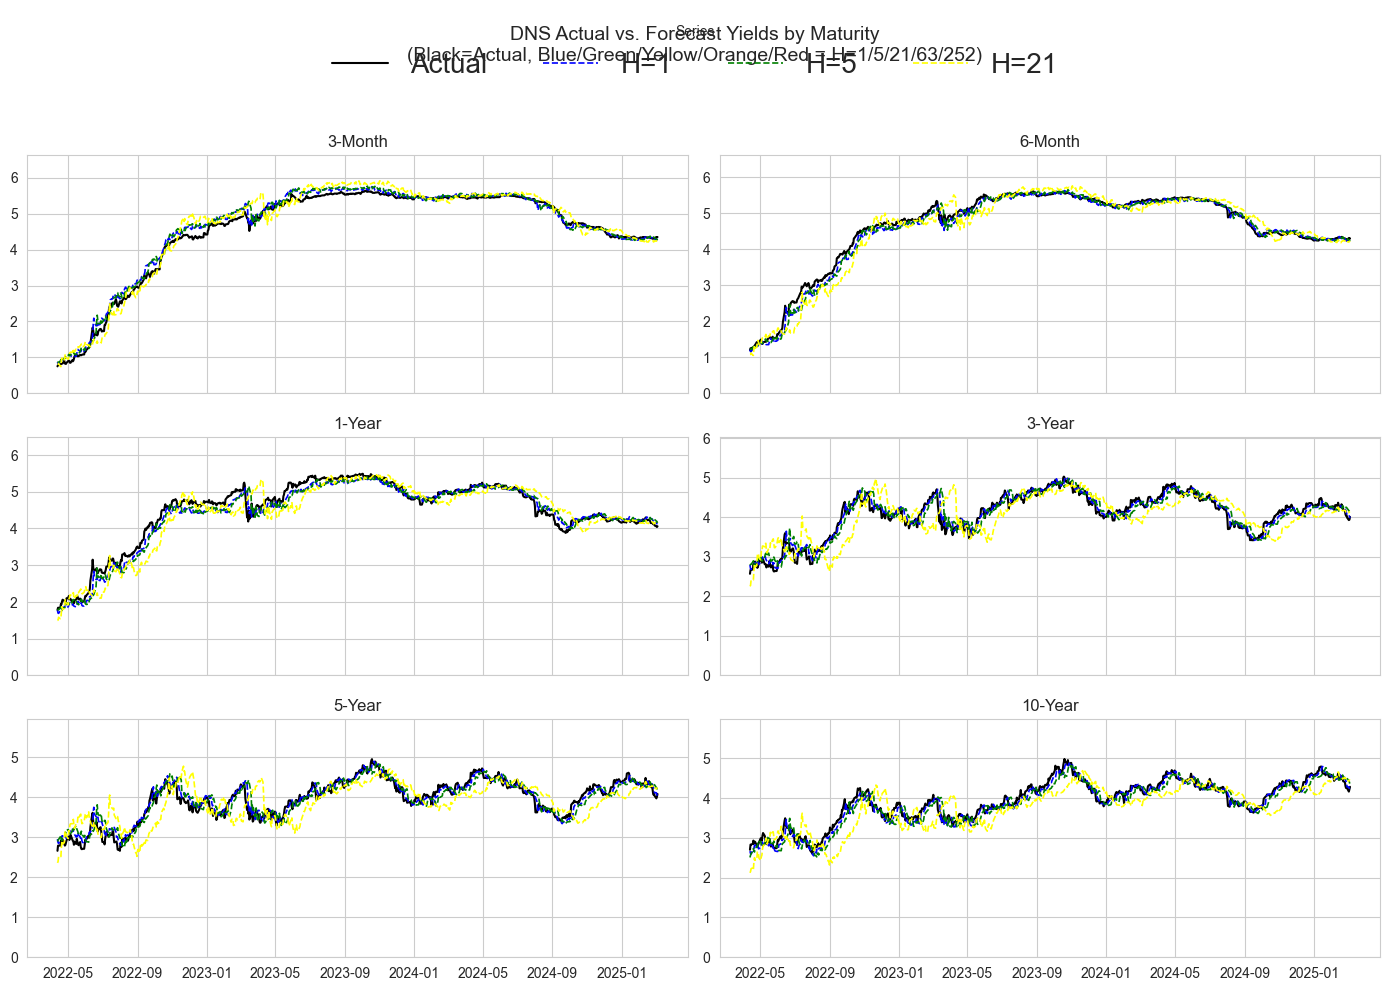

In [36]:
# ---------------------- Imports ---------------------- #
import os
import ast
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------- Config ---------------------- #
data_dir  = r'C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\DNS_KF'
horizons = [1, 5, 21]
colors   = {1:'blue', 5:'green', 21:'yellow'}

# map your columns to nice names
maturity_cols = {
    "US_3m":  "3-Month",
    "US_6m":  "6-Month",
    "US_1y":  "1-Year",
    "US_3y":  "3-Year",
    "US_5y":  "5-Year",
    "US_10y": "10-Year"
}


keys = list(maturity_cols.keys())
names = [maturity_cols[k] for k in keys]

# ---------------------- Load Actual (from horizon=1) ---------------------- #
df1 = pd.read_csv(
    os.path.join(data_dir, f"dns_kf_h1_fixed_window_results.csv"),
    parse_dates=["eval_date"]
).set_index("eval_date")

# parse the string-lists into real lists
df1["true_yields"] = df1["true_yields"].apply(ast.literal_eval)
actual = pd.DataFrame(df1["true_yields"].tolist(), index=df1.index, columns=keys)
actual.rename(columns=maturity_cols, inplace=True)

# ---------------------- Load Forecasts ---------------------- #
preds = {}
for h in horizons:
    fp = os.path.join(data_dir, f"dns_kf_h{h}_fixed_window_results.csv")
    df = pd.read_csv(fp, parse_dates=["eval_date"]).set_index("eval_date")
    df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)
    P = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
    P.rename(columns=maturity_cols, inplace=True)
    preds[h] = P

# ---------------------- Plot 6 Subplots (with Y-limit at max actual +100bps) ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, maturity in enumerate(names):
    ax = axes[i]

    # 1) plot actual
    ax.plot(
        actual.index,
        actual[maturity],
        color="black",
        linestyle="-",
        linewidth=1.5,
        label="Actual"
    )

    # 2) determine cap = max actual + 0.01 (100 bps)
    y_cap = actual[maturity].max() + 1
    ax.set_ylim(0, y_cap)   # floor at 0, ceiling at max_actual + 0.01

    # 3) plot forecasts
    for h in horizons:
        ax.plot(
            preds[h].index,
            preds[h][maturity],
            color=colors[h],
            linestyle="--",
            linewidth=1.2,
            label=f"H={h}"
        )

    ax.set_title(maturity, fontsize=12)
    ax.grid(True)

# shared legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    title="Series",
    loc="upper center",
    ncol=6,
    frameon=False,
    fontsize=20
)

fig.suptitle(
    "DNS Actual vs. Forecast Yields by Maturity\n"
    "(Black=Actual, Blue/Green/Yellow/Orange/Red = H=1/5/21/63/252)",
    fontsize=14, y=0.97
)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


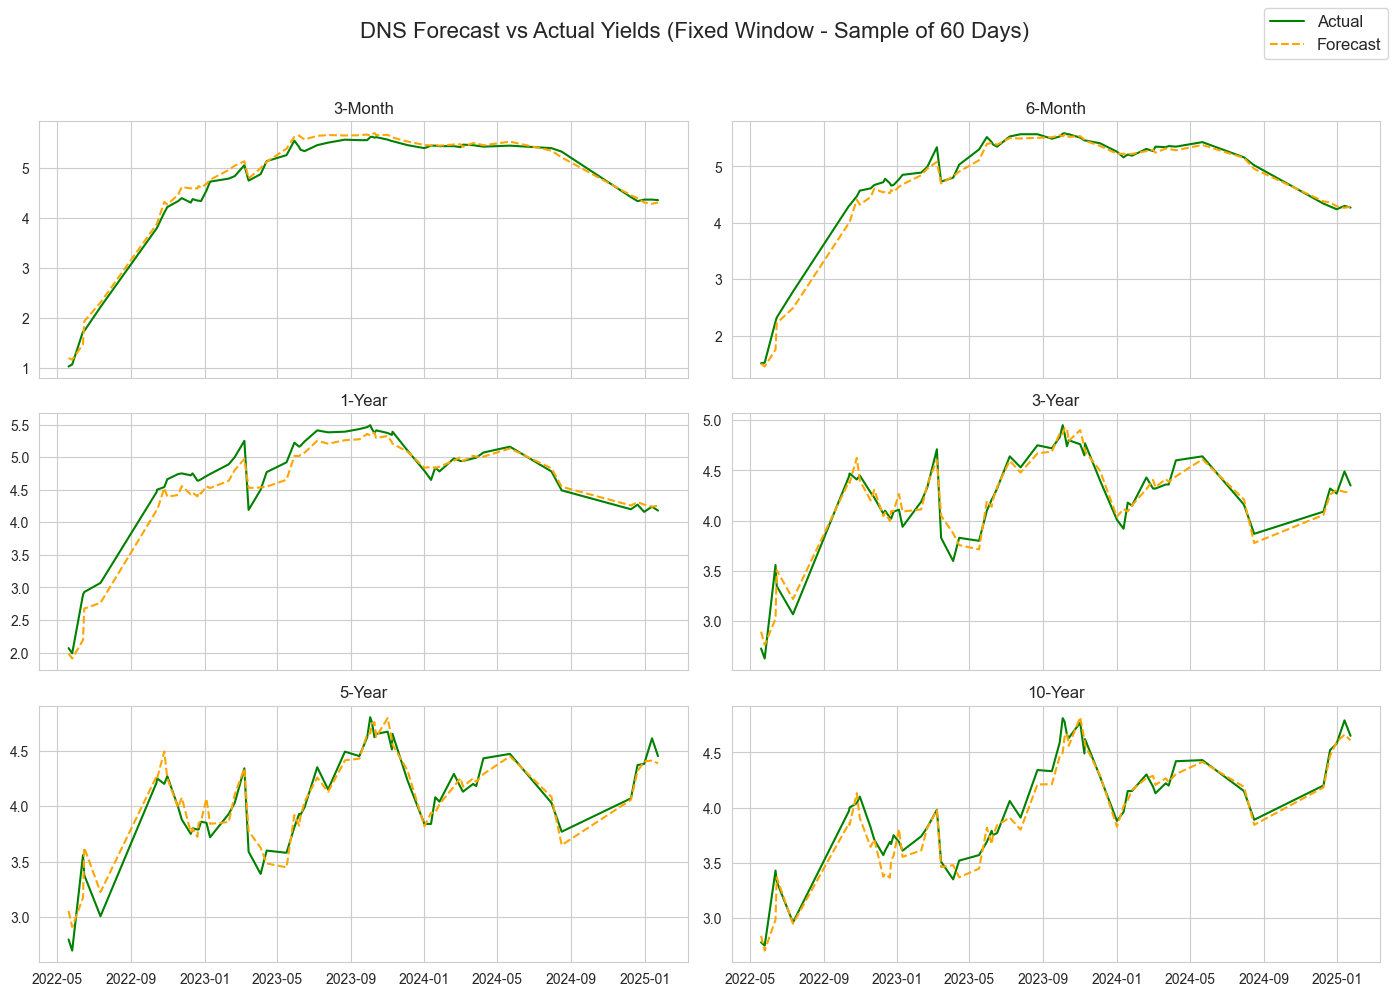

In [6]:
# ---------------------- Imports ---------------------- #
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- Config ---------------------- #
data_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\DNS_KF"
results_path = os.path.join(data_dir, "dns_kf_h1_fixed_window_results.csv")

# ---------------------- Maturity Mapping ---------------------- #
maturity_cols = {
    "US_3m": "3-Month",
    "US_6m": "6-Month",
    "US_1y": "1-Year",
    "US_3y": "3-Year",
    "US_5y": "5-Year",
    "US_10y": "10-Year"
}
keys = list(maturity_cols.keys())

# ---------------------- Load & Parse Results ---------------------- #
df = pd.read_csv(results_path, parse_dates=["eval_date"])

# If the file contains multiple horizons, filter to the one you want (e.g. horizon == 1)
df = df[df["horizon"] == 1].copy()

# Use the eval_date as index
df.set_index("eval_date", inplace=True)

# Convert the string‐encoded lists into real lists
df["true_yields"] = df["true_yields"].apply(ast.literal_eval)
df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)

# Split list‐columns into separate numeric columns
true_df = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
pred_df = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)

# Rename to the human‐readable maturities
true_df.rename(columns=maturity_cols, inplace=True)
pred_df.rename(columns=maturity_cols, inplace=True)

# ---------------------- Align Indices ---------------------- #
common_cols = true_df.columns.intersection(pred_df.columns)
true_df, pred_df = true_df.align(pred_df, join='inner', axis=0)

# ---------------------- Sample 60 Random Dates ---------------------- #
np.random.seed(10)  # For reproducibility
sampled_dates = np.random.choice(true_df.index, size=60, replace=False)
sampled_dates.sort()

sampled_true = true_df.loc[sampled_dates]
sampled_pred = pred_df.loc[sampled_dates]

# ---------------------- Plot Actual vs Predicted (Zoomed) ---------------------- #
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, maturity in enumerate(common_cols):
    ax = axes[i]
    ax.plot(
        sampled_true.index,
        sampled_true[maturity],
        label="Actual",
        color="green",
    )
    ax.plot(
        sampled_pred.index,
        sampled_pred[maturity],
        label="Forecast",
        color="orange",
        linestyle="--",
    )
    ax.set_title(maturity, fontsize=12)
    ax.grid(True)

# Add global legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", fontsize=12)

fig.suptitle(
    "DNS Forecast vs Actual Yields (Fixed Window - Sample of 60 Days)", fontsize=16
)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\azorb\AppData\Local\Temp\ipykernel_219272\2028434391.py:13: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(rolling_mae_bps.index, rolling_mae_bps[col], label=maturity_cols[col])


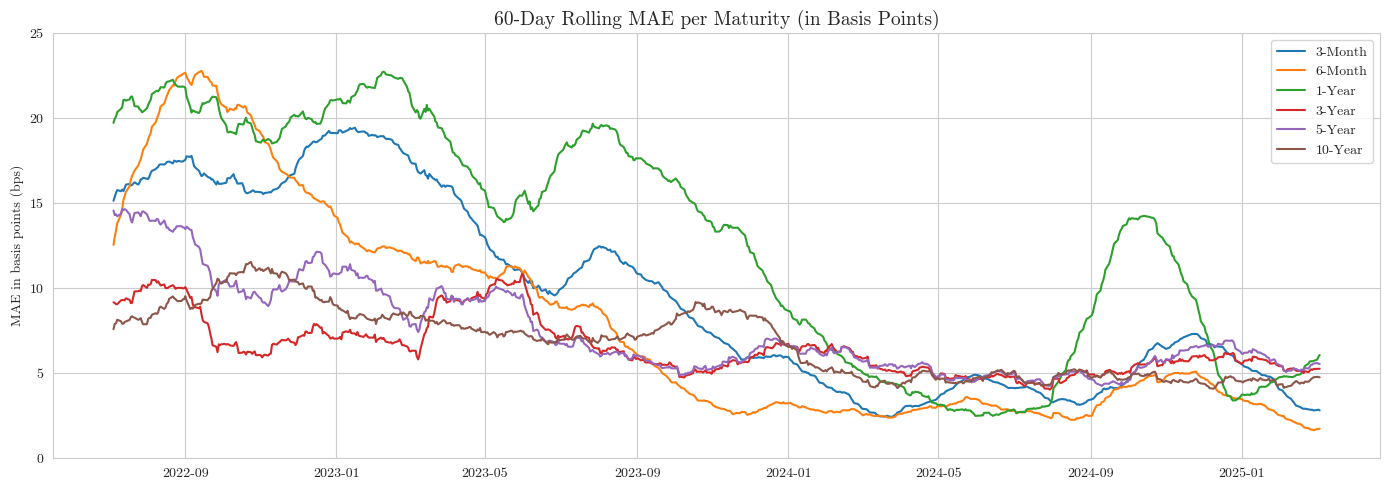

In [31]:
# ---------------------- Compute Rolling Window MAE in bps ---------------------- #
window_size = 60
mae_df = pd.DataFrame(index=true_df.index, columns=common_cols)

for col in common_cols:
    mae_df[col] = (true_df[col] - pred_df[col]).abs()

rolling_mae_bps = mae_df.rolling(window=window_size).mean() * 100  # Convert to bps

# ---------------------- Plot Rolling MAE (bps) ---------------------- #
plt.figure(figsize=(14, 5))
for col in common_cols:
    plt.plot(rolling_mae_bps.index, rolling_mae_bps[col], label=maturity_cols[col])

plt.title("60-Day Rolling MAE per Maturity (in Basis Points)", fontsize=14)
plt.ylabel("MAE in basis points (bps)")
plt.ylim(0, 25)  # Set y-axis range from 0 to 25 bps
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
import pandas as pd
import numpy as np

# ---------------------- Load Yield Data ---------------------- #
Y_df = pd.read_csv(r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Output\Dependent\Y_df.csv", index_col=0, parse_dates=True)  # Replace with your actual path

# ---------------------- Config ---------------------- #
forecast_horizon = 1  # you can change to 5, 21, etc.
maturities = Y_df.columns

# ---------------------- Random Walk MAE ---------------------- #
# y_hat_t+h = y_t → forecast at t is actual value from t
actual = Y_df.shift(-forecast_horizon)
forecast = Y_df

mae_rw = (actual - forecast).abs().dropna()

# ---------------------- Report Summary ---------------------- #
mae_rw_summary = mae_rw.mean() * 100  # convert to bps

print("Random Walk MAE (bps):")
print(mae_rw_summary)


Random Walk MAE (bps):
US_3m     1.875402
US_6m     1.739006
US_1y     2.098856
US_3y     3.638363
US_5y     4.100644
US_10y    4.099750
dtype: float64


C:\Users\azorb\AppData\Local\Temp\ipykernel_219272\1365690620.py:38: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(rolling_rw_mae_bps_last756.index, rolling_rw_mae_bps_last756[col], label=maturity_cols[col])


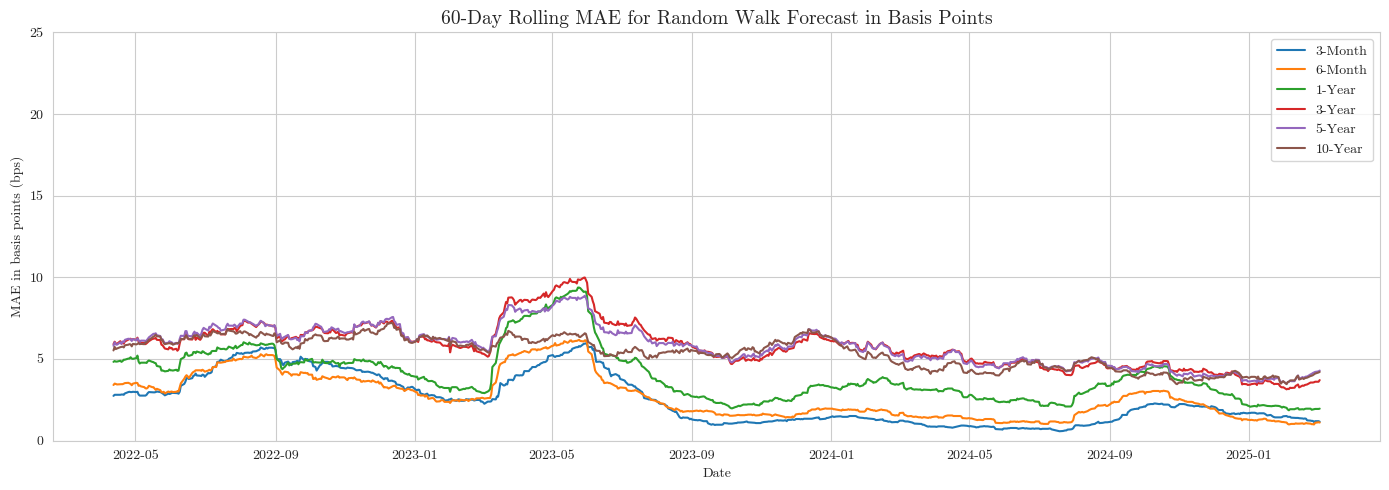

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------- Load Yield Data ---------------------- #
Y_df = pd.read_csv(
    r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Data Processing\Output\Dependent\Y_df.csv",
    index_col=0, parse_dates=True
)

# ---------------------- Config ---------------------- #
forecast_horizon = 1
window_size = 60
maturity_cols = {
    "US_3m": "3-Month",
    "US_6m": "6-Month",
    "US_1y": "1-Year",
    "US_3y": "3-Year",
    "US_5y": "5-Year",
    "US_10y": "10-Year"
}
common_cols = list(maturity_cols.keys())

# ---------------------- Random Walk Forecast ---------------------- #
actual = Y_df[common_cols].shift(-forecast_horizon)
forecast = Y_df[common_cols]
rw_mae = (actual - forecast).abs().dropna()

# ---------------------- Compute 60-Day Rolling MAE in Basis Points ---------------------- #
rolling_rw_mae_bps = rw_mae.rolling(window=window_size).mean() * 100

# ---------------------- Select Last 756 Observations ---------------------- #
rolling_rw_mae_bps_last756 = rolling_rw_mae_bps.iloc[-756:]

# ---------------------- Plot Rolling MAE for Random Walk (Last 756 Days) ---------------------- #
plt.figure(figsize=(14, 5))
for col in common_cols:
    plt.plot(rolling_rw_mae_bps_last756.index, rolling_rw_mae_bps_last756[col], label=maturity_cols[col])

plt.title(f"60-Day Rolling MAE for Random Walk Forecast in Basis Points", fontsize=14)
plt.ylabel("MAE in basis points (bps)")
plt.xlabel("Date")
plt.ylim(0, 25)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\azorb\AppData\Local\Temp\ipykernel_219272\697674693.py:37: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(rolling_mae_bps_h1.index, rolling_mae_bps_h1[col], label=label_map.get(col, col))


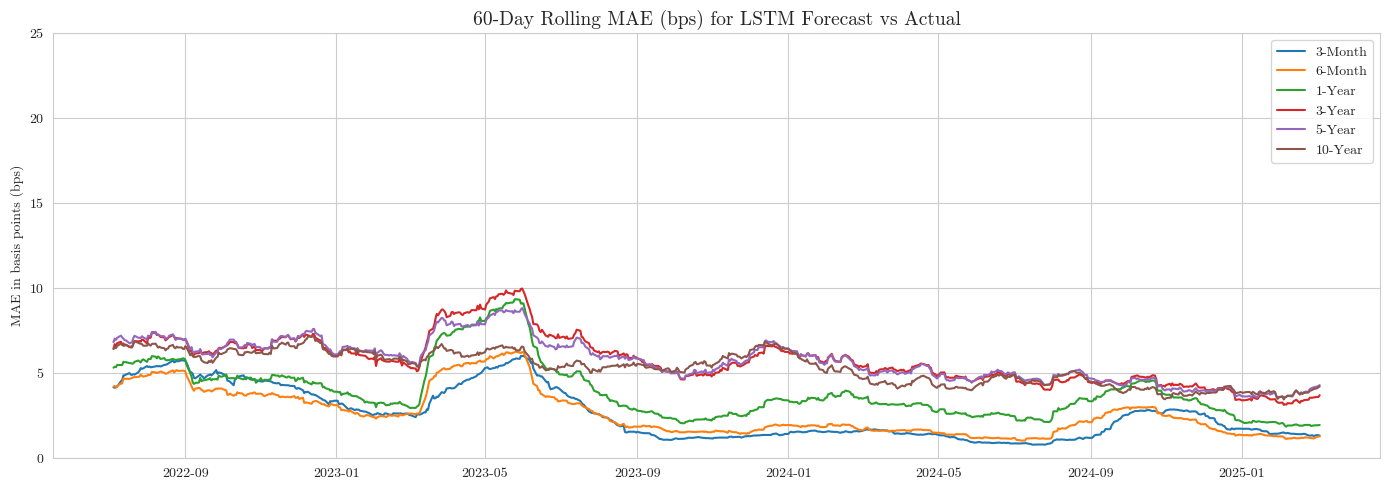

In [41]:
# ---------------------- Map Forecast Columns ---------------------- #
rename_map = {
    "m1_reconstructed": "US_3m",
    "m2_reconstructed": "US_6m",
    "m3_reconstructed": "US_1y",
    "m4_reconstructed": "US_3y",
    "m5_reconstructed": "US_5y",
    "m6_reconstructed": "US_10y"
}

# Rename forecast columns
reconstructed_h1 = reconstructed_h1.rename(columns=rename_map)

# Define common cols explicitly
common_cols = list(rename_map.values())

# ---------------------- Align and Compute Errors ---------------------- #
aligned_actual_h1_filtered = aligned_actual_h1[common_cols].copy()
reconstructed_h1_filtered = reconstructed_h1[common_cols].copy()

mae_df_h1 = (aligned_actual_h1_filtered - reconstructed_h1_filtered).abs()
rolling_mae_bps_h1 = mae_df_h1.rolling(window=60).mean() * 100  # Convert to bps

# ---------------------- Define Label Mapping for Plot ---------------------- #
label_map = {
    "US_3m": "3-Month",
    "US_6m": "6-Month",
    "US_1y": "1-Year",
    "US_3y": "3-Year",
    "US_5y": "5-Year",
    "US_10y": "10-Year"
}

# ---------------------- Plot ---------------------- #
plt.figure(figsize=(14, 5))
for col in common_cols:
    plt.plot(rolling_mae_bps_h1.index, rolling_mae_bps_h1[col], label=label_map.get(col, col))

plt.title("60-Day Rolling MAE (bps) for LSTM Forecast vs Actual", fontsize=14)
plt.ylabel("MAE in basis points (bps)")
plt.ylim(0, 25)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
reconstructed_h1

m1_reconstructed  m2_reconstructed  m3_reconstructed  \
date                                                               
2022-04-13          0.738809          1.199767          1.775270   
2022-04-14          0.748212          1.200043          1.785474   
2022-04-15          0.787253          1.249906          1.845295   
2022-04-18          0.788974          1.250264          1.845608   
2022-04-19          0.809118          1.270738          1.845974   
...                      ...               ...               ...   
2025-02-27          4.303130          4.275087          4.119407   
2025-02-28          4.312110          4.274892          4.129130   
2025-03-03          4.312200          4.244670          4.079028   
2025-03-04          4.341280          4.304660          4.058952   
2025-03-05          4.333040          4.274247          4.039007   

            m4_reconstructed  m5_reconstructed  m6_reconstructed  
date                                                              
2022-04-13          2.584116          2.665955          2.722266  
2022-04-14          2.574250          2.665890          2.702285  
2022-04-15          2.674120          2.795802          2.832218  
2022-04-18          2.674295          2.796042          2.832295  
2022-04-19          2.684500          2.796126          2.852354  
...                      ...               ...               ...  
2025-02-27          4.039770          4.063614          4.250440  
2025-02-28          4.049681          4.093572          4.290248  
2025-03-03          3.989690          4.033483          4.240207  
2025-03-04          3.929658          3.973633          4.159995  
2025-03-05          3.939821          4.013298          4.220345  

[756 rows x 6 columns]

C:\Users\azorb\AppData\Local\Temp\ipykernel_219272\4207751034.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(daily_avg_mae_bps.index, daily_avg_mae_bps, label='Average MAE Across Maturities')


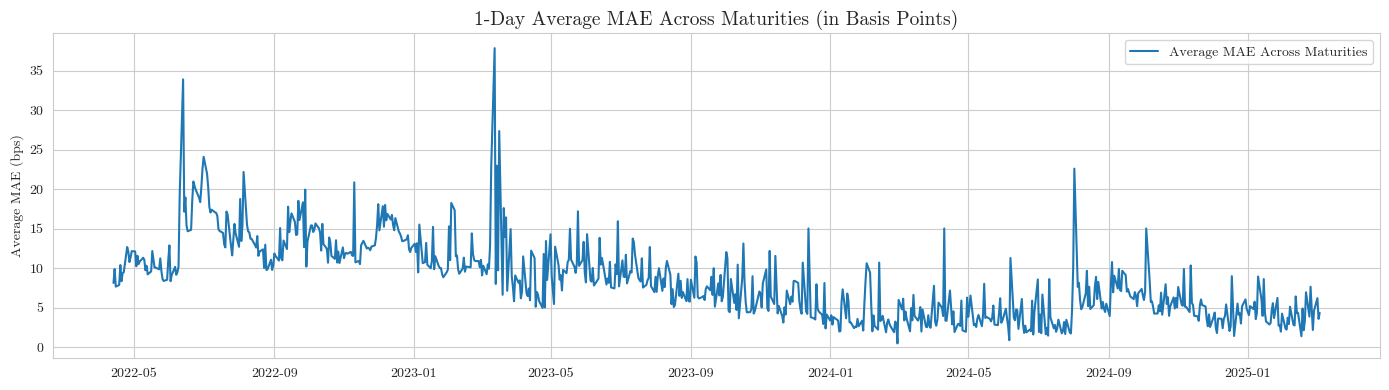

In [33]:
# ---------------------- Compute 1-Day MAE in bps ---------------------- #
mae_df = pd.DataFrame(index=true_df.index, columns=common_cols)

for col in common_cols:
    mae_df[col] = (true_df[col] - pred_df[col]).abs()

mae_df_bps = mae_df * 100  # Convert to basis points

# Compute the daily average MAE across all maturities
daily_avg_mae_bps = mae_df_bps.mean(axis=1)

# ---------------------- Plot Daily Average MAE (bps) ---------------------- #
plt.figure(figsize=(14, 4))
plt.plot(daily_avg_mae_bps.index, daily_avg_mae_bps, label='Average MAE Across Maturities')
plt.title("1-Day Average MAE Across Maturities (in Basis Points)", fontsize=14)
plt.ylabel("Average MAE (bps)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\azorb\AppData\Local\Temp\ipykernel_219272\742014071.py:16: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.plot(rw_daily_avg_mae_bps.index, rw_daily_avg_mae_bps, label='Random Walk 1-Day Horizon', color='gray')


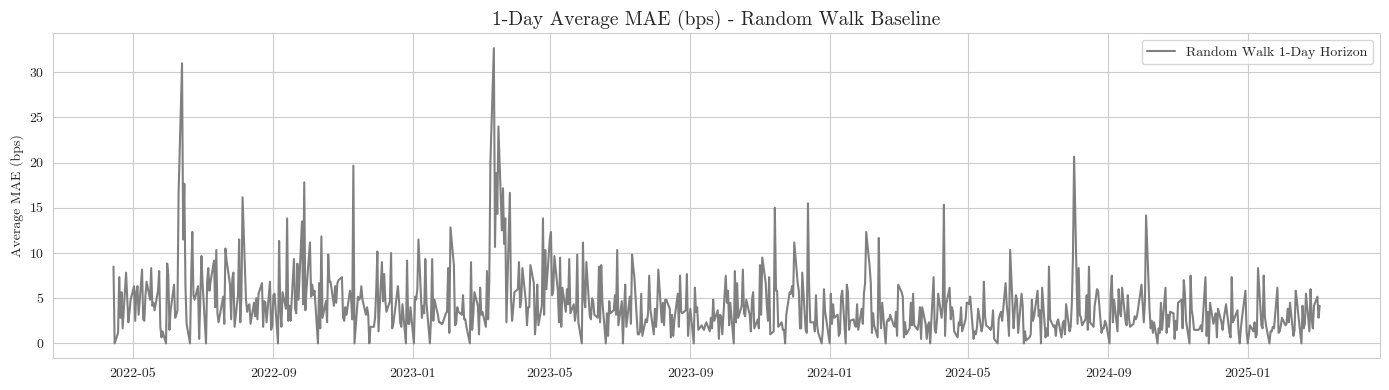

In [34]:
# ---------------------- Random Walk 1-Day Horizon Baseline ---------------------- #
# Shift yields forward by 1 day to form the random walk prediction
rw_pred_df = true_df.shift(1)

# Compute 1-Day MAE in bps between actual and random walk
rw_mae_df = (true_df - rw_pred_df).abs() * 100  # Convert to bps

# Keep only the columns in common_cols
rw_mae_df = rw_mae_df[common_cols]

# Compute daily average MAE across all maturities
rw_daily_avg_mae_bps = rw_mae_df.mean(axis=1)

# ---------------------- Plot Random Walk Daily Average MAE (bps) ---------------------- #
plt.figure(figsize=(14, 4))
plt.plot(rw_daily_avg_mae_bps.index, rw_daily_avg_mae_bps, label='Random Walk 1-Day Horizon', color='gray')
plt.title("1-Day Average MAE (bps) - Random Walk Baseline", fontsize=14)
plt.ylabel("Average MAE (bps)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
# ---------------------- Imports ---------------------- #
import pandas as pd
import matplotlib.pyplot as plt
import os

# ---------------------- Config ---------------------- #
dns_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\DNS_KF"
lstm_output_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\LSTM\Output\LSTM Regression with Technical Indicators\Reconstructed Yields"

true_path = os.path.join(dns_dir, "dns_fixed_window_true.csv")
dns_preds_path = os.path.join(dns_dir, "dns_fixed_window_preds.csv")
lstm_preds_path = os.path.join(lstm_output_dir, "reconstructed_yields_H1.csv")

# ---------------------- Load Data ---------------------- #
true_df = pd.read_csv(true_path, index_col=0, parse_dates=True)
dns_pred_df = pd.read_csv(dns_preds_path, index_col=0, parse_dates=True)
lstm_pred_df = pd.read_csv(lstm_preds_path, index_col=0, parse_dates=True)

# ---------------------- Maturity Mapping ---------------------- #
maturity_cols = {
    "US_3m": "3-Month",
    "US_6m": "6-Month",
    "US_1y": "1-Year",
    "US_3y": "3-Year",
    "US_5y": "5-Year",
    "US_10y": "10-Year"
}
rename_map = {
    "m1_reconstructed": "US_3m",
    "m2_reconstructed": "US_6m",
    "m3_reconstructed": "US_1y",
    "m4_reconstructed": "US_3y",
    "m5_reconstructed": "US_5y",
    "m6_reconstructed": "US_10y"
}
common_cols = list(maturity_cols.keys())

# ---------------------- Rename LSTM Columns ---------------------- #
lstm_pred_df = lstm_pred_df.rename(columns=rename_map)

# ---------------------- Align All DataFrames ---------------------- #
true_df = true_df[common_cols]
dns_pred_df = dns_pred_df[common_cols]
lstm_pred_df = lstm_pred_df[common_cols]
rw_pred_df = true_df.shift(1)

true_df, dns_pred_df = true_df.align(dns_pred_df, join='inner', axis=0)
true_df, lstm_pred_df = true_df.align(lstm_pred_df, join='inner', axis=0)
true_df, rw_pred_df = true_df.align(rw_pred_df, join='inner', axis=0)

# ---------------------- Compute MAE in Basis Points ---------------------- #
dns_mae_bps = (true_df - dns_pred_df).abs().mean() * 100
lstm_mae_bps = (true_df - lstm_pred_df).abs().mean() * 100
rw_mae_bps = (true_df - rw_pred_df).abs().mean() * 100

# ---------------------- Combine Results ---------------------- #
mae_comparison_df = pd.DataFrame({
    "DNS_MAE_bps": dns_mae_bps,
    "LSTM_MAE_bps": lstm_mae_bps,
    "RW_MAE_bps": rw_mae_bps
})
mae_comparison_df.index = [maturity_cols[col] for col in mae_comparison_df.index]


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\azorb\\PycharmProjects\\Predicting the Yield Curve\\Model Fit\\Output\\DNS_KF\\dns_fixed_window_true.csv'

In [79]:
import os
import ast
import glob
import re
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score

# ---------------------- Config ----------------------
base_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output"
model_folders = ["RW", "AR_YW", "VAR_YW", "DNS_VAR_YW", "DNS_KF", "DNS_KF_CORR"]

# mapping of internal keys to human-readable maturities
maturity_cols = {
    "US_3m":  "3-Month",
    "US_6m":  "6-Month",
    "US_1y":  "1-Year",
    "US_3y":  "3-Year",
    "US_5y":  "5-Year",
    "US_10y": "10-Year"
}
keys = list(maturity_cols.keys())
human_names = [maturity_cols[k] for k in keys]

# container for results
results = []

# ---------------------- Processing Loop ----------------------
for model in model_folders:
    folder = os.path.join(base_dir, model)
    for filepath in glob.glob(os.path.join(folder, "*.csv")):
        # read the forecast file
        df = pd.read_csv(filepath, parse_dates=["eval_date"]).set_index("eval_date")
        # determine horizon
        if "horizon" in df.columns:
            horizon = int(df["horizon"].iloc[0])
        else:
            basename = os.path.basename(filepath)
            m = re.search(r"_h(\d+)_", basename)
            horizon = int(m.group(1)) if m else np.nan

        # parse list columns
        df["true_yields"] = df["true_yields"].apply(ast.literal_eval)
        df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)

        # expand into DataFrames
        true_df = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
        pred_df = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
        # rename columns to human names
        true_df.rename(columns=maturity_cols, inplace=True)
        pred_df.rename(columns=maturity_cols, inplace=True)
        # align indices
        true_df, pred_df = true_df.align(pred_df, join="inner", axis=0)

        # compute directional labels (True=up, False=down or flat)
        true_dir = true_df.diff().fillna(0) > 0
        pred_dir = pred_df.diff().fillna(0) > 0

        # evaluate metrics per maturity
        for mat in human_names:
            y_true = true_df[mat]
            y_pred = pred_df[mat]

            # regression metrics
            rmse = np.sqrt(mean_squared_error(y_true, y_pred))
            mae = mean_absolute_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)
            # direction metrics
            acc = accuracy_score(true_dir[mat], pred_dir[mat])
            f1 = f1_score(true_dir[mat], pred_dir[mat])

            results.append({
                "Model": model,
                "Horizon": horizon,
                "Maturity": mat,
                "RMSE": rmse,
                "MAE": mae,
                "R2": r2,
                "Accuracy": acc,
                "F1": f1
            })

# ---------------------- Results Table ----------------------
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(["Model", "Maturity", "Horizon"])

# Print or save
print(results_df.to_string(index=False))
# results_df.to_csv(os.path.join(base_dir, "forecast_comparison_metrics.csv"), index=False)


      Model  Horizon Maturity     RMSE      MAE         R2  Accuracy       F1
      AR_YW        1   1-Year 0.113069 0.072411   0.982677  0.509259 0.515033
      AR_YW        5   1-Year 0.229152 0.160700   0.928849  0.498677 0.505867
      AR_YW       21   1-Year 0.642083 0.498395   0.441382  0.485450 0.498065
      AR_YW       63   1-Year 1.582007 1.251375  -2.391166  0.456349 0.495706
      AR_YW      252   1-Year 3.659006 3.435030 -17.140885  0.481481 0.430233
      AR_YW        1  10-Year 0.115721 0.091195   0.952121  0.505291 0.498660
      AR_YW        5  10-Year 0.228152 0.187934   0.813888  0.498677 0.495340
      AR_YW       21  10-Year 0.517442 0.423708   0.042701  0.498677 0.498013
      AR_YW       63  10-Year 0.987182 0.840077  -2.484327  0.476190 0.484375
      AR_YW      252  10-Year 2.266396 2.193689 -17.365220  0.486772 0.467033
      AR_YW        1  3-Month 0.079569 0.049403   0.996049  0.476190 0.437500
      AR_YW        5  3-Month 0.210480 0.140949   0.972352  0.48

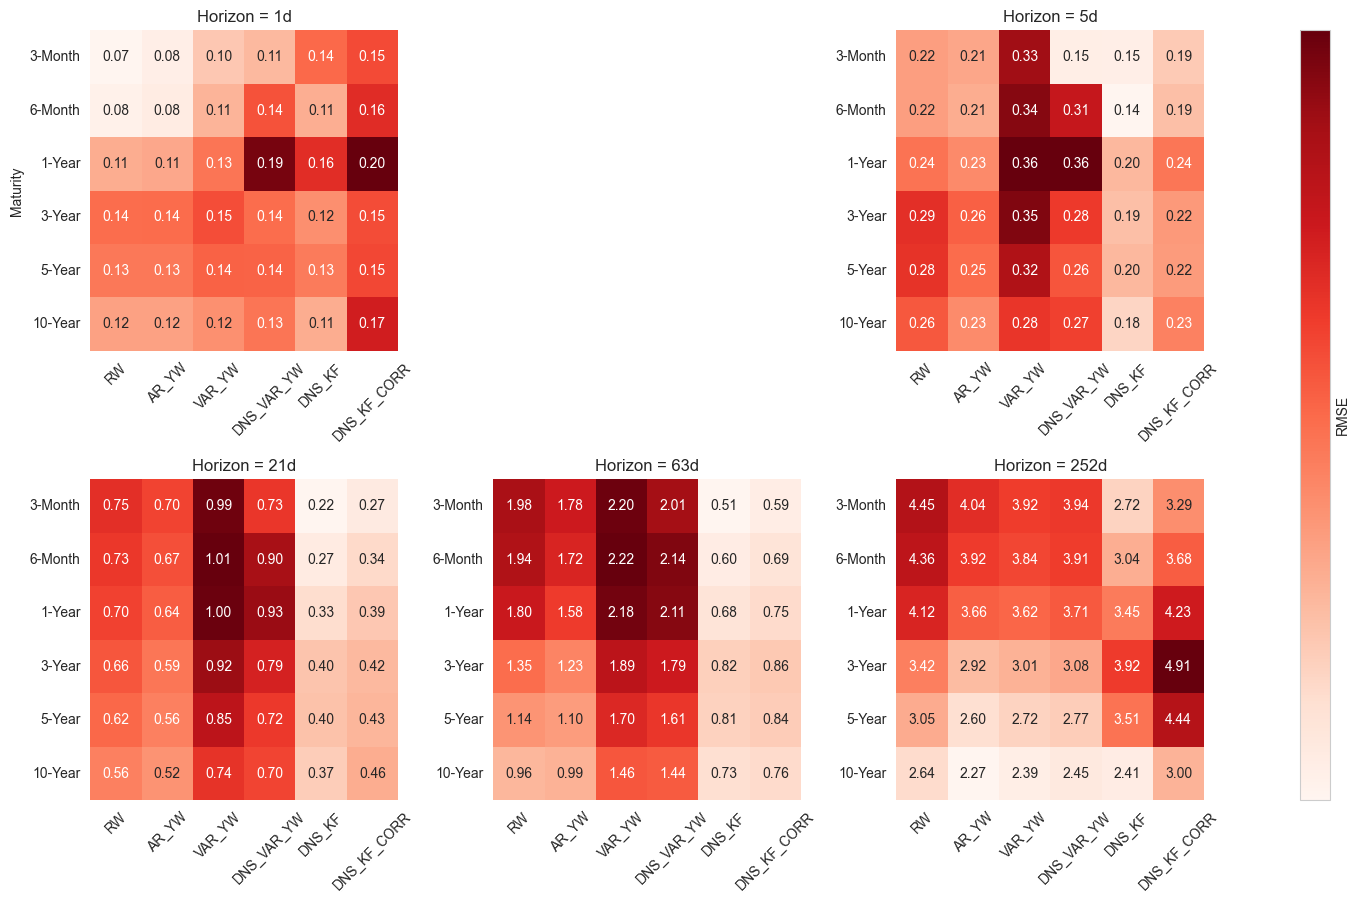

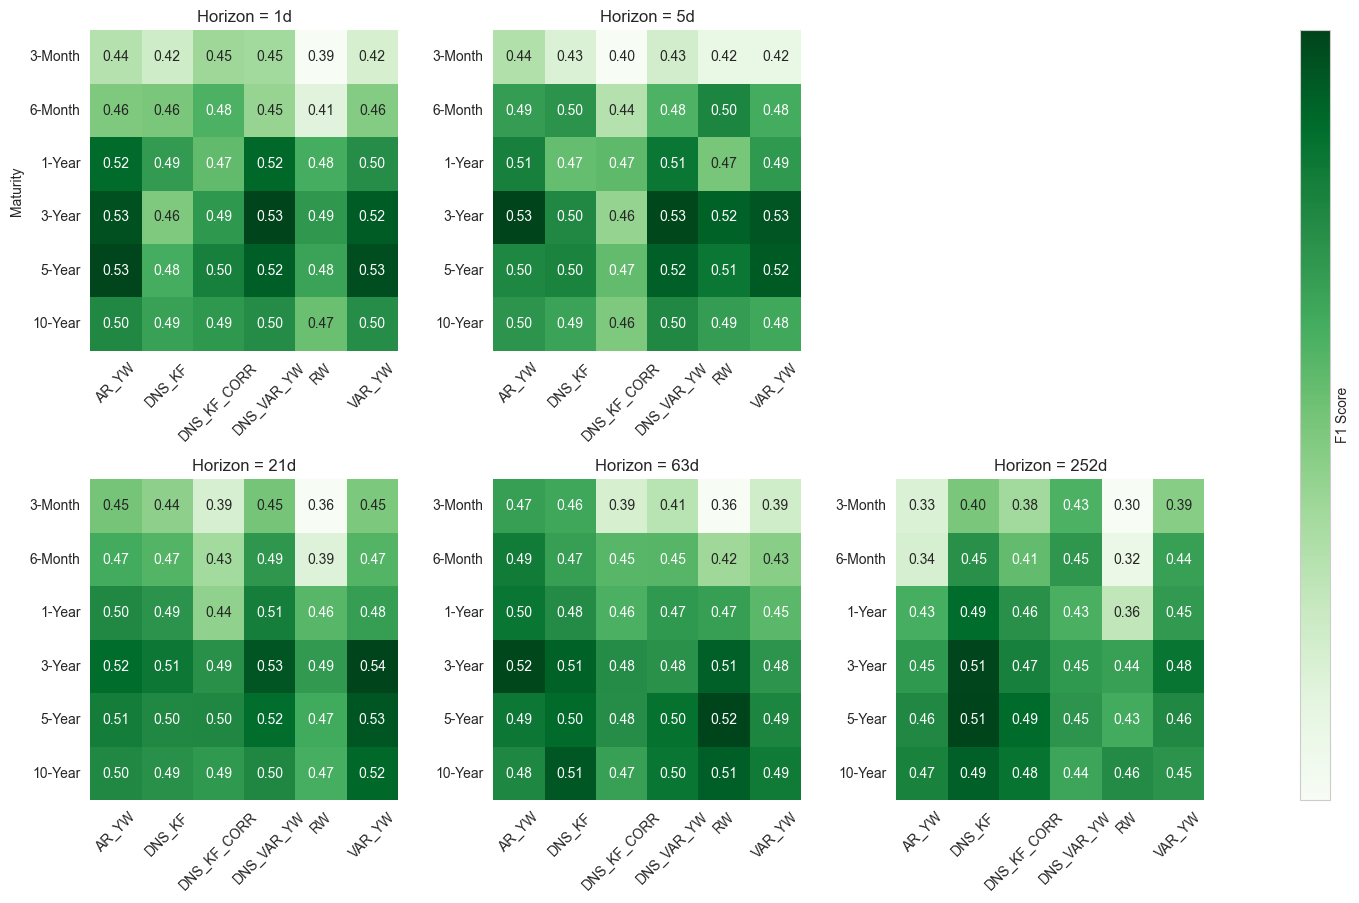

In [89]:
import os
import ast
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, f1_score

# ---------------------- Config ----------------------
base_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output"
model_folders = ["RW", "AR_YW", "VAR_YW", "DNS_VAR_YW", "DNS_KF", "DNS_KF_CORR"]

# human-readable maturities and desired display order
maturity_cols = {
    "US_3m":  "3-Month",
    "US_6m":  "6-Month",
    "US_1y":  "1-Year",
    "US_3y":  "3-Year",
    "US_5y":  "5-Year",
    "US_10y": "10-Year"
}
order = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]
keys = list(maturity_cols.keys())

# ---------------------- Compute Metrics ----------------------
results = []
for model in model_folders:
    folder = os.path.join(base_dir, model)
    for filepath in glob.glob(os.path.join(folder, "*.csv")):
        df = pd.read_csv(filepath, parse_dates=["eval_date"]).set_index("eval_date")
        # extract horizon
        if "horizon" in df.columns:
            horizon = int(df["horizon"].iloc[0])
        else:
            m = re.search(r"_h(\d+)_", os.path.basename(filepath))
            horizon = int(m.group(1)) if m else np.nan

        # parse lists
        df["true_yields"] = df["true_yields"].apply(ast.literal_eval)
        df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)
        true_df = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
        pred_df = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
        true_df.rename(columns=maturity_cols, inplace=True)
        pred_df.rename(columns=maturity_cols, inplace=True)
        # align
        true_df, pred_df = true_df.align(pred_df, join="inner", axis=0)
        # directional flags
        true_dir = true_df.diff().fillna(0) > 0
        pred_dir = pred_df.diff().fillna(0) > 0

        # compute metrics
        for mat in order:
            y_true = true_df[mat]
            y_pred = pred_df[mat]
            results.append({
                "Model": model,
                "Horizon": horizon,
                "Maturity": mat,
                "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
                "F1": f1_score(true_dir[mat], pred_dir[mat])
            })

# assemble DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(["Horizon","Model","Maturity"], inplace=True)

# ---------------------- Visualize by Horizon ----------------------
from matplotlib.gridspec import GridSpec

horizons = sorted(results_df["Horizon"].unique())

# --- Figure 1: RMSE heatmaps in pyramid layout ---
fig_rmse = plt.figure(figsize=(16, 10))
gs_rmse = GridSpec(2, 4, figure=fig_rmse,
                   width_ratios=[1, 1, 1, 0.1], height_ratios=[1, 1],
                   wspace=0.4, hspace=0.4)
# define axes for 5 heatmaps (top row centered by skipping column 1)
axes_rmse = [
    fig_rmse.add_subplot(gs_rmse[0, 0]),
    fig_rmse.add_subplot(gs_rmse[0, 2]),
    fig_rmse.add_subplot(gs_rmse[1, 0]),
    fig_rmse.add_subplot(gs_rmse[1, 1]),
    fig_rmse.add_subplot(gs_rmse[1, 2]),
]
# plot each horizon
for ax, h in zip(axes_rmse, horizons):
    pivot = (
        results_df[results_df['Horizon']==h]
        .pivot(index='Maturity', columns='Model', values='RMSE')
        .reindex(order).reindex(columns=["RW","AR_YW","VAR_YW","DNS_VAR_YW","DNS_KF","DNS_KF_CORR"])
    )
    sns.heatmap(pivot, annot=True, fmt='.2f', cmap='Reds', cbar=False, ax=ax)
    ax.set_title(f'Horizon = {h}d')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)
    # y-label only on first subplot
    if ax.get_subplotspec().rowspan.start == 0 and ax.get_subplotspec().colspan.start == 0:
        ax.set_ylabel('Maturity')
    else:
        ax.set_ylabel('')
# colorbar on rightmost
cax_rmse = fig_rmse.add_subplot(gs_rmse[:, 3])
mappable = axes_rmse[-1].collections[0]
fig_rmse.colorbar(mappable, cax=cax_rmse, label='RMSE')
cax_rmse.set_xticks([])
cax_rmse.set_yticks([])
plt.show()

# --- Figure 2: F1 heatmaps in pyramid layout ---
fig_f1 = plt.figure(figsize=(16, 10))
gs_f1 = GridSpec(2, 4, figure=fig_f1,
                  width_ratios=[1, 1, 1, 0.1], height_ratios=[1, 1],
                  wspace=0.4, hspace=0.4)
axes_f1 = [
    fig_f1.add_subplot(gs_f1[0, 0]),
    fig_f1.add_subplot(gs_f1[0, 1]),
    fig_f1.add_subplot(gs_f1[1, 0]),
    fig_f1.add_subplot(gs_f1[1, 1]),
    fig_f1.add_subplot(gs_f1[1, 2]),
]
for ax, h in zip(axes_f1, horizons):
    pivot = (
        results_df[results_df['Horizon']==h]
        .pivot(index='Maturity', columns='Model', values='F1')
        .reindex(order)
    )
    sns.heatmap(pivot, annot=True, fmt='.2f', cmap='Greens', cbar=False, ax=ax)
    ax.set_title(f'Horizon = {h}d')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)
    if ax.get_subplotspec().rowspan.start == 0 and ax.get_subplotspec().colspan.start == 0:
        ax.set_ylabel('Maturity')
    else:
        ax.set_ylabel('')
# colorbar on rightmost
cax_f1 = fig_f1.add_subplot(gs_f1[:, 3])
mappable_f1 = axes_f1[-1].collections[0]
fig_f1.colorbar(mappable_f1, cax=cax_f1, label='F1 Score')
cax_f1.set_xticks([])
cax_f1.set_yticks([])
plt.show()


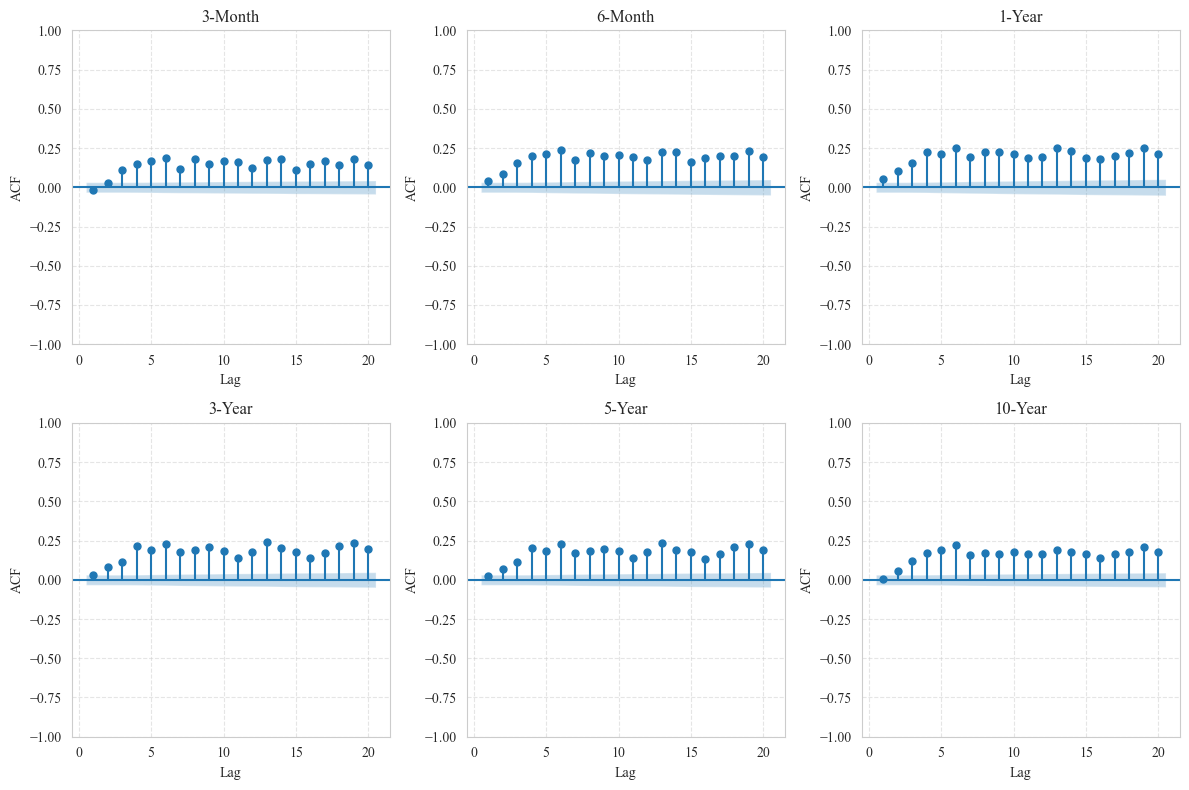

In [6]:
import os
import ast
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# ——— configure font for academic look ———
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# ——— paths and maturities ———
base_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output"
model = "DNS_KF"
maturity_cols = {
    "US_3m":  "3-Month",
    "US_6m":  "6-Month",
    "US_1y":  "1-Year",
    "US_3y":  "3-Year",
    "US_5y":  "5-Year",
    "US_10y": "10-Year"
}
order = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]
keys = list(maturity_cols.keys())

# ——— load all DNS_KF forecasts and truths into big DataFrames ———
folder = os.path.join(base_dir, model)
true_list, pred_list, dates = [], [], []

for fp in glob.glob(os.path.join(folder, "*.csv")):
    df = pd.read_csv(fp, parse_dates=["eval_date"]).set_index("eval_date")
    # recover lists
    df["true_yields"] = df["true_yields"].apply(ast.literal_eval)
    df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)

    true_df = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
    pred_df = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)

    true_list.append(true_df)
    pred_list.append(pred_df)

# concatenate (aligned on dates)
true_all = pd.concat(true_list).sort_index().rename(columns=maturity_cols)
pred_all = pd.concat(pred_list).sort_index().rename(columns=maturity_cols)

# ensure we only keep dates where both are present
true_all, pred_all = true_all.align(pred_all, join="inner", axis=0)

# ——— compute residuals ———
residuals = pred_all - true_all  # positive = over‐forecast
# optionally drop the first row if you worry about diff artifacts, but not needed here

# ——— plot ACFs in 2×3 grid ———
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

for ax, mat in zip(axes, order):
    plot_acf(residuals[mat], lags=20, ax=ax, title=f"{mat}", zero=False)
    ax.set_xlabel('Lag')
    ax.set_ylabel('ACF')
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


AttributeError: 'SubplotSpec' object has no attribute 'new_subplotspec'

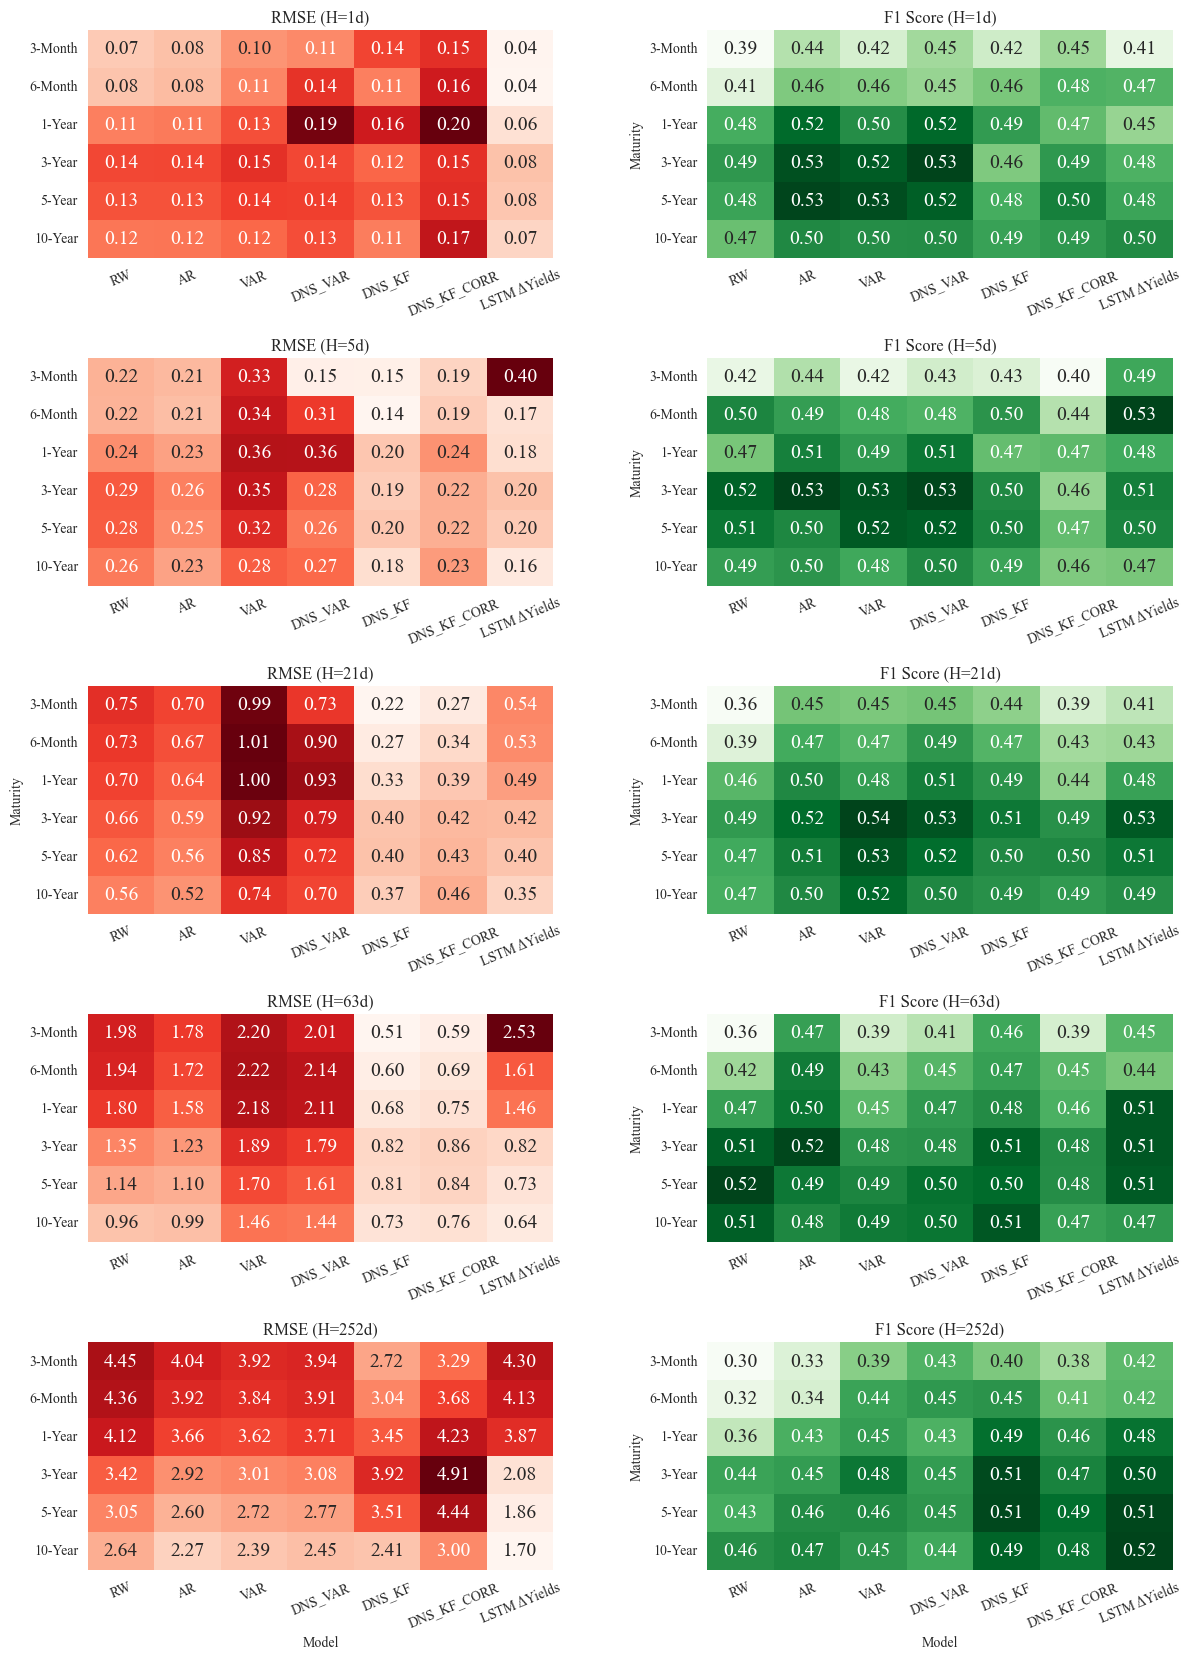

In [4]:
import os
import ast
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, f1_score

# Option A: using rcParams
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# Option B: using rc
from matplotlib import rc
rc('font', family='serif', serif=['Times New Roman'])



# ---------------------- Config ----------------------
base_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output"
model_folders = ["RW", "AR_YW", "VAR_YW", "DNS_VAR_YW", "DNS_KF", "DNS_KF_CORR", "LSTM"]

# human-readable maturities and desired display order
maturity_cols = {
    "US_3m":  "3-Month",
    "US_6m":  "6-Month",
    "US_1y":  "1-Year",
    "US_3y":  "3-Year",
    "US_5y":  "5-Year",
    "US_10y": "10-Year"
}
order = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]
keys = list(maturity_cols.keys())

# ---------------------- Compute Metrics ----------------------
results = []
for model in model_folders:
    folder = os.path.join(base_dir, model)
    for filepath in glob.glob(os.path.join(folder, "*.csv")):
        df = pd.read_csv(filepath, parse_dates=["eval_date"]).set_index("eval_date")
        # extract horizon
        if "horizon" in df.columns:
            horizon = int(df["horizon"].iloc[0])
        else:
            m = re.search(r"_h(\d+)_", os.path.basename(filepath))
            horizon = int(m.group(1)) if m else np.nan

        # parse lists
        df["true_yields"] = df["true_yields"].apply(ast.literal_eval)
        df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)
        true_df = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
        pred_df = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
        true_df.rename(columns=maturity_cols, inplace=True)
        pred_df.rename(columns=maturity_cols, inplace=True)
        # align
        true_df, pred_df = true_df.align(pred_df, join="inner", axis=0)
        # directional flags
        true_dir = true_df.diff().fillna(0) > 0
        pred_dir = pred_df.diff().fillna(0) > 0

        # compute metrics
        for mat in order:
            y_true = true_df[mat]
            y_pred = pred_df[mat]
            results.append({
                "Model": model,
                "Horizon": horizon,
                "Maturity": mat,
                "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
                "F1": f1_score(true_dir[mat], pred_dir[mat])
            })

# assemble DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(["Horizon","Model","Maturity"], inplace=True)

# ---------------------- Plot 2×5 Layout with Adjusted Spacing ----------------------
from matplotlib.gridspec import GridSpec

horizons = sorted(results_df["Horizon"].unique())
# ---------------------- Assemble & Rename Models ---------------------- #
results_df = pd.DataFrame(results)
results_df.sort_values(["Horizon","Model","Maturity"], inplace=True)

# rename the LSTM model label
results_df['Model'] = results_df['Model'].replace({'LSTM': 'LSTM ΔYields'})

# and make sure your plotting order matches the new name:
models_order = ["RW", "AR_YW", "VAR_YW", "DNS_VAR_YW", "DNS_KF", "DNS_KF_CORR", "LSTM ΔYields"]\
# create figure and GridSpec with reduced row height and increased spacing
fig = plt.figure(figsize=(14, 20))
# height_ratios reduce each subplot height by 30% (relative), wspace and hspace increased by 10%
gs = GridSpec(len(horizons), 2, figure=fig,
              width_ratios=[1,1], height_ratios=[0.3]*len(horizons),
              wspace=0.33, hspace=0.44)

for i, h in enumerate(horizons):
    # RMSE subplot
    ax1 = fig.add_subplot(gs[i, 0])
    pivot_rmse = (results_df[results_df['Horizon']==h]
                  .pivot(index='Maturity', columns='Model', values='RMSE')
                  .reindex(order)
                  .reindex(columns=models_order))
    # rename columns to exclude '_YW'
    pivot_rmse.rename(columns=lambda x: x.replace('_YW',''), inplace=True)
    sns.heatmap(pivot_rmse, annot=True, fmt='.2f', cmap='Reds', cbar=False, ax=ax1, annot_kws={"fontsize": 14})
    ax1.set_title(f'RMSE (H={h}d)')
    # rotate xticks 60 degrees
    ax1.tick_params(axis='x', rotation=22.5)
    # y-label horizontal
    if i == len(horizons)//2:
        ax1.set_ylabel('Maturity')
    else:
        ax1.set_ylabel('')
    if i < len(horizons)-1:
        ax1.set_xlabel('')

    # F1 subplot
    ax2 = fig.add_subplot(gs[i, 1])
    pivot_f1 = (results_df[results_df['Horizon']==h]
                .pivot(index='Maturity', columns='Model', values='F1')
                .reindex(order)
                .reindex(columns=models_order))
    pivot_f1.rename(columns=lambda x: x.replace('_YW',''), inplace=True)
    sns.heatmap(pivot_f1, annot=True, fmt='.2f', cmap='Greens', cbar=False, ax=ax2, annot_kws={"fontsize": 14})
    ax2.set_title(f'F1 Score (H={h}d)')
    ax2.tick_params(axis='x', rotation=22.5)
    if i < len(horizons)-1:
        ax2.set_xlabel('')

# add colorbars
cax1 = fig.add_subplot(gs[:, 0].new_subplotspec((slice(None), 1), rowspan=len(horizons)))
fig.colorbar(ax1.collections[0], cax=cax1, label='RMSE')
cax2 = fig.add_subplot(gs[:, 1].new_subplotspec((slice(None), 1), rowspan=len(horizons)))
fig.colorbar(ax2.collections[0], cax=cax2, label='F1 Score')

fig.suptitle('Forecast Metrics by Horizon and Maturity', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




C:\Users\azorb\AppData\Local\Temp\ipykernel_492828\826361929.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0,0,1,0.96])


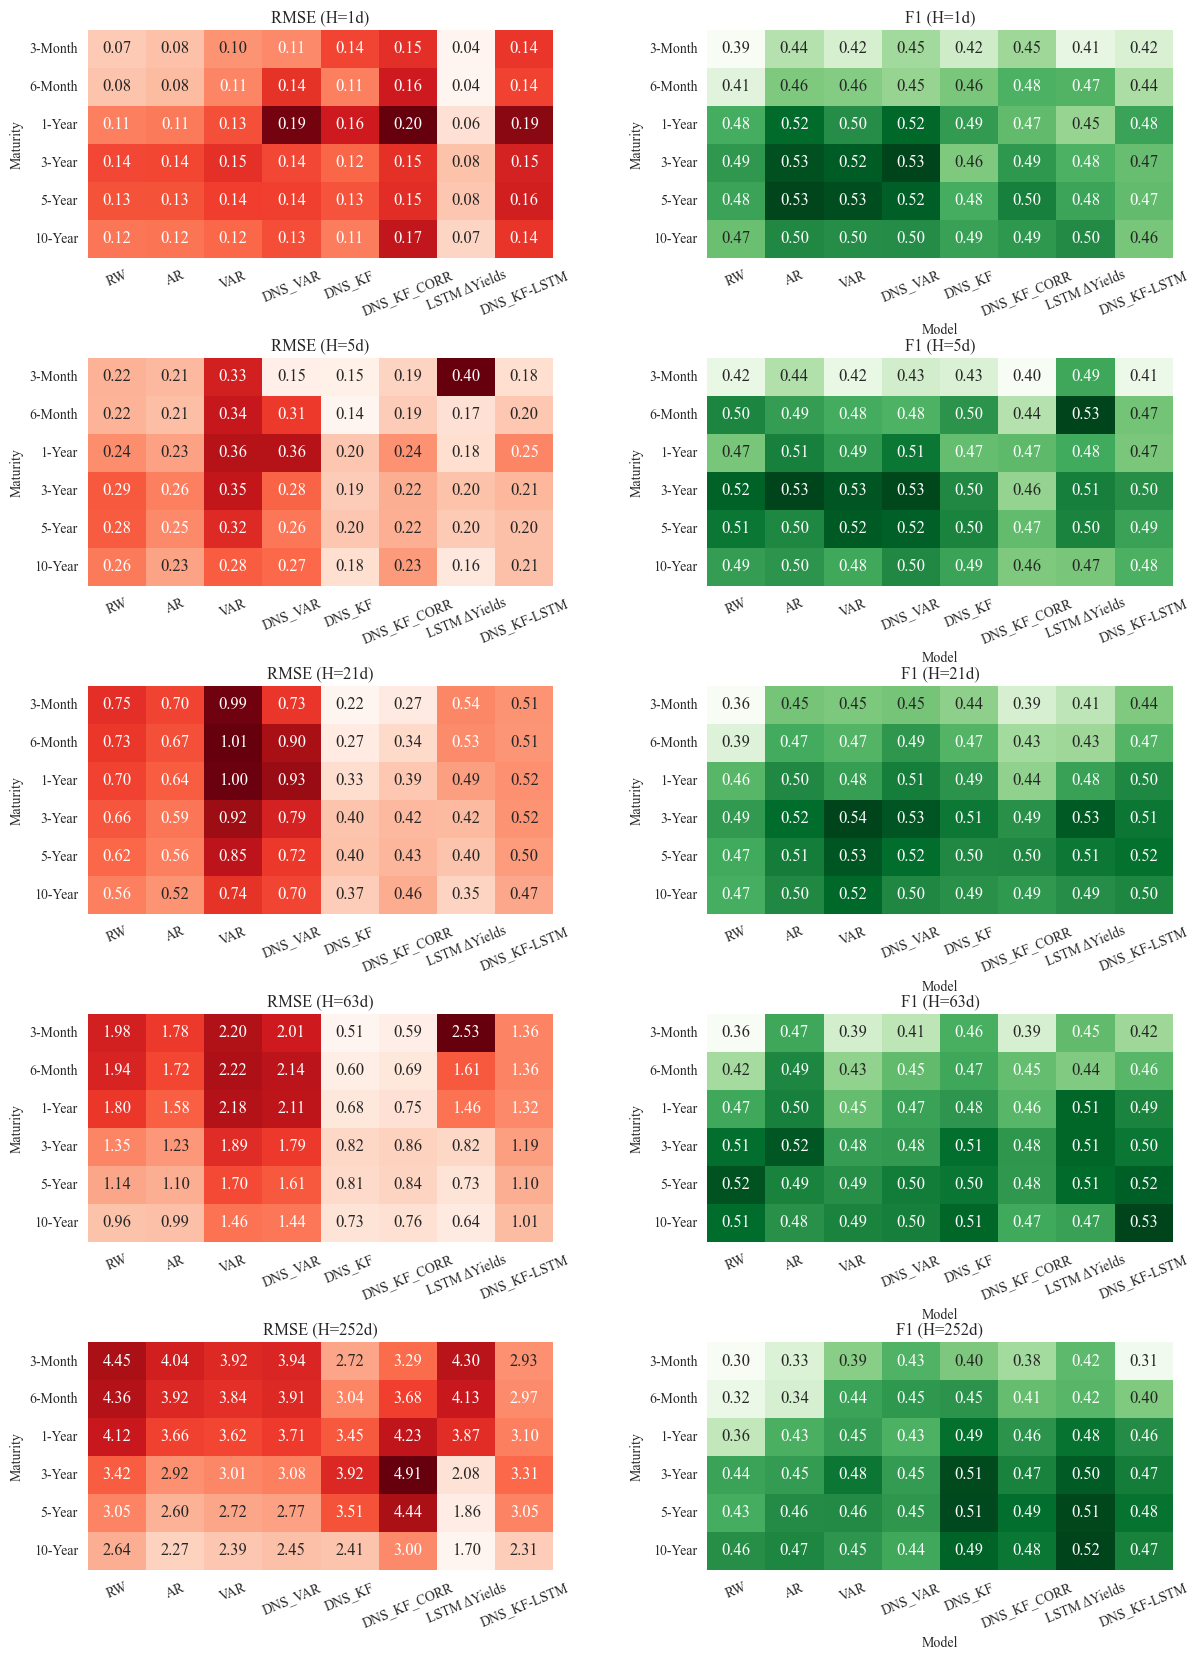

In [14]:
import os
import ast
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, f1_score

# Option A: using rcParams
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# ---------------------- Config ----------------------
base_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output"
model_folders = ["RW", "AR_YW", "VAR_YW", "DNS_VAR_YW", "DNS_KF", "DNS_KF_CORR", "LSTM"]

# where the LSTM‐corrector files live
error_dir = os.path.join(base_dir, "LSTM Error Corrector")
error_dfs = {}
for fname in glob.glob(os.path.join(error_dir, "holdout_forecasts_h*.csv")):
    df_err = pd.read_csv(fname, parse_dates=["eval_date"])
    # if errors stored as lists, uncomment next line:
    # df_err["forecasted_error"] = df_err["forecasted_error"].apply(ast.literal_eval)
    df_err.set_index("eval_date", inplace=True)
    h = int(df_err["horizon"].iloc[0])
    error_dfs[h] = df_err["forecasted_error"]

maturity_cols = {
    "US_3m":  "3-Month",
    "US_6m":  "6-Month",
    "US_1y":  "1-Year",
    "US_3y":  "3-Year",
    "US_5y":  "5-Year",
    "US_10y": "10-Year"
}
order = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]
keys = list(maturity_cols.keys())

results = []
for model in model_folders:
    folder = os.path.join(base_dir, model)
    for filepath in glob.glob(os.path.join(folder, "*.csv")):
        df = pd.read_csv(filepath, parse_dates=["eval_date"]).set_index("eval_date")
        # horizon extraction
        if "horizon" in df.columns:
            horizon = int(df["horizon"].iloc[0])
        else:
            m = re.search(r"_h(\d+)_", os.path.basename(filepath))
            horizon = int(m.group(1)) if m else np.nan

        df["true_yields"]     = df["true_yields"].apply(ast.literal_eval)
        df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)
        true_df = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys).rename(columns=maturity_cols)
        pred_df = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys).rename(columns=maturity_cols)

              # --- DNS_KF-LSTM hybrid ---
        if model == "DNS_KF" and horizon in error_dfs:
            # get the error series and literal‐list DataFrame if needed
            err = error_dfs[horizon]
            # if errors are lists, turn into a DataFrame of shape (dates × maturities)
            if not isinstance(err.iloc[0], (float, np.floating)):
                err = pd.DataFrame(err.tolist(), index=err.index, columns=order)

            # compute the intersection of dates across true, pred and err
            common_idx = true_df.index.intersection(pred_df.index).intersection(err.index)

            # reindex all frames to that common index
            t_common = true_df.loc[common_idx]
            p_common = pred_df.loc[common_idx]
            e_common = err.loc[common_idx]

            # if error is a Series, broadcast; if DataFrame, align columns
            if isinstance(e_common, pd.Series):
                hybrid = p_common.add(e_common, axis=0)
            else:
                hybrid = p_common + e_common

            # now drop any remaining NaNs (just in case)
            hybrid = hybrid.dropna(how="any")
            t_common = t_common.loc[hybrid.index]

            # compute directional flags
            td = t_common.diff().fillna(0) > 0
            pd_ = hybrid.diff().fillna(0) > 0

            # append hybrid metrics
            for mat in order:
                results.append({
                    "Model": "DNS_KF-LSTM",
                    "Horizon": horizon,
                    "Maturity": mat,
                    "RMSE": np.sqrt(mean_squared_error(t_common[mat], hybrid[mat])),
                    "F1": f1_score(td[mat], pd_[mat])
                })

        # --- vanilla model ---
        t2, p2 = true_df.align(pred_df, join="inner", axis=0)
        t2 = t2.dropna(how="any")
        p2 = p2.dropna(how="any")
        td2 = t2.diff().fillna(0) > 0
        pd2 = p2.diff().fillna(0) > 0
        for mat in order:
            results.append({
                "Model": model,
                "Horizon": horizon,
                "Maturity": mat,
                "RMSE": np.sqrt(mean_squared_error(t2[mat], p2[mat])),
                "F1": f1_score(td2[mat], pd2[mat])
            })

# assemble & plot (unchanged)
results_df = pd.DataFrame(results)
results_df.sort_values(["Horizon","Model","Maturity"], inplace=True)
results_df['Model'] = results_df['Model'].replace({'LSTM':'LSTM ΔYields'})
models_order = ["RW","AR_YW","VAR_YW","DNS_VAR_YW","DNS_KF","DNS_KF_CORR","LSTM ΔYields","DNS_KF-LSTM"]

from matplotlib.gridspec import GridSpec
horizons = sorted(results_df["Horizon"].unique())
fig = plt.figure(figsize=(14, 4*len(horizons)))
gs = GridSpec(len(horizons), 2, figure=fig,
              width_ratios=[1,1], height_ratios=[1]*len(horizons),
              wspace=0.33, hspace=0.44)

for i, h in enumerate(horizons):
    sub = results_df[results_df["Horizon"]==h]
    ax1 = fig.add_subplot(gs[i,0])
    piv_rmse = (sub
        .pivot(index="Maturity", columns="Model", values="RMSE")
        .reindex(order)
        .reindex(columns=models_order)
    )
    piv_rmse.rename(columns=lambda x: x.replace("_YW",""), inplace=True)
    sns.heatmap(piv_rmse, annot=True, fmt=".2f", cmap="Reds", cbar=False, ax=ax1, annot_kws={"fontsize":12})
    ax1.set_title(f"RMSE (H={h}d)"); ax1.tick_params(axis="x", rotation=22.5)
    ax1.set_xlabel("")  # remove the "Model" label on the x-axis


    ax2 = fig.add_subplot(gs[i,1])
    piv_f1 = (sub
        .pivot(index="Maturity", columns="Model", values="F1")
        .reindex(order)
        .reindex(columns=models_order)
    )
    piv_f1.rename(columns=lambda x: x.replace("_YW",""), inplace=True)
    sns.heatmap(piv_f1, annot=True, fmt=".2f", cmap="Greens", cbar=False, ax=ax2, annot_kws={"fontsize":12})
    ax2.set_title(f"F1 (H={h}d)"); ax2.tick_params(axis="x", rotation=22.5)
    ax1.set_xlabel("")  # remove the "Model" label on the x-axis

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()


Models in results_df: ['AR' 'DNS_KF' 'DNS_KF-LSTM' 'DNS_KF_CORR' 'DNS_VAR' 'LSTM ΔYields' 'RW'
 'VAR']


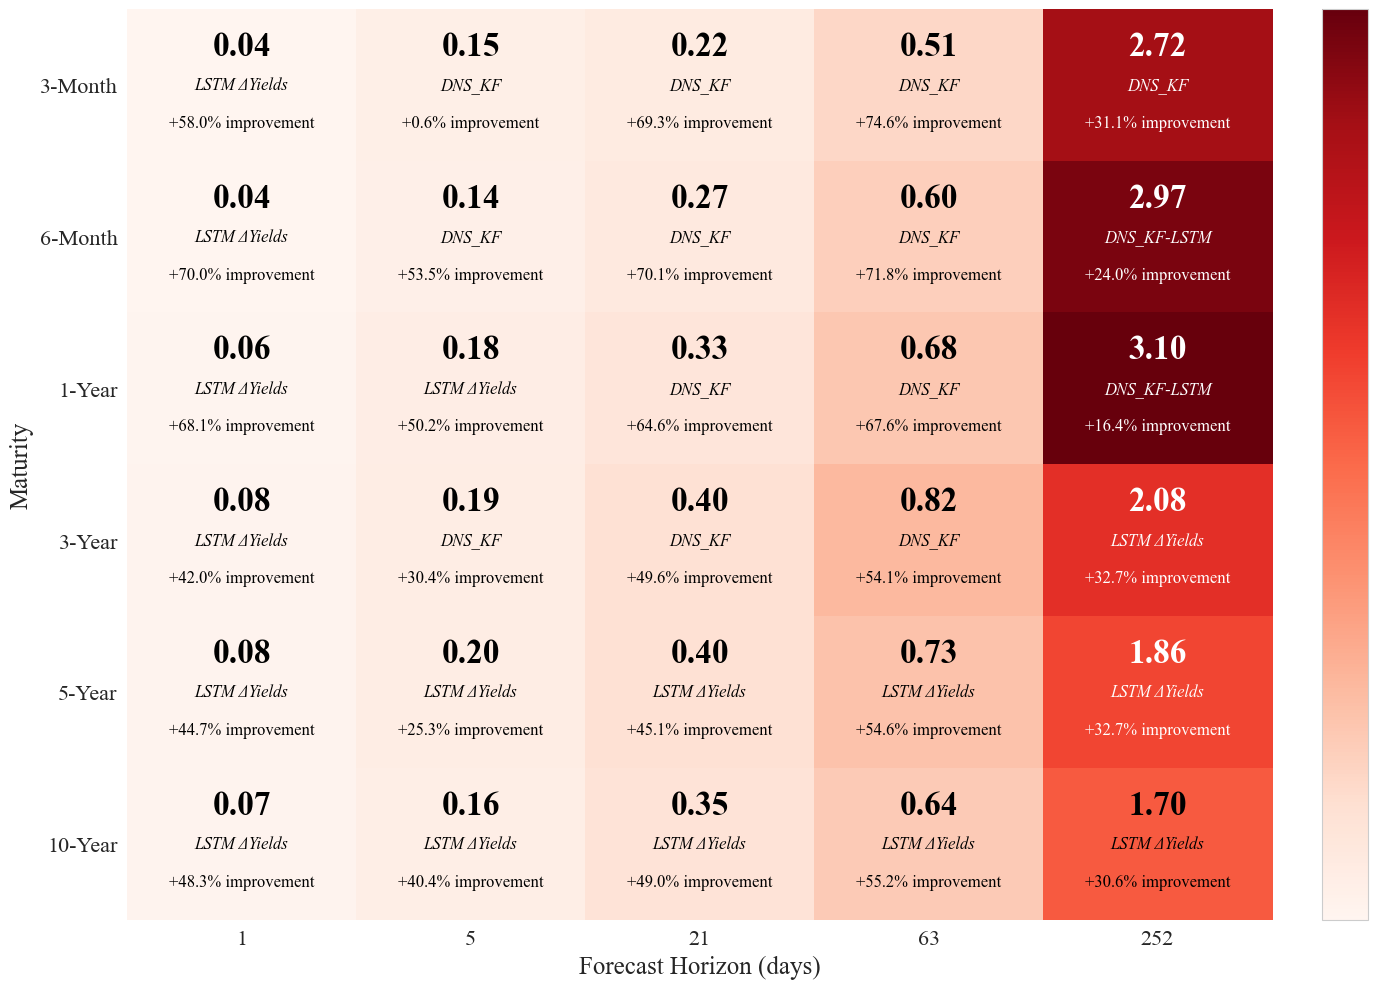

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ─── 0) Quick sanity check: what are your model names? ────────────────────────
print("Models in results_df:", results_df['Model'].unique())

# Suppose the baseline shows up as exactly "DNS_VAR_YW" or maybe just "DNS_VAR".
# We’ll catch either by using a contains filter.

# ─── 1) Oracle best RMSE per (Horizon, Maturity) ─────────────────────────────
best_idx   = results_df.groupby(['Horizon','Maturity'])['RMSE'].idxmin()
best_df    = results_df.loc[best_idx, ['Horizon','Maturity','RMSE','Model']]

# ─── 2) Pull out baseline rows robustly ──────────────────────────────────────
baseline_df = (
    results_df
    [results_df['Model'].str.contains(r"^DNS_VAR", regex=True)]
    [['Horizon','Maturity','RMSE']]
    .rename(columns={'RMSE':'Baseline_RMSE'})
)

# ─── 3) Merge so every best‐of‐model row carries its baseline RMSE ────────────
merged = best_df.merge(
    baseline_df,
    on=['Horizon','Maturity'],
    how='left'       # keep all best_df rows
)

# ─── 4) Compute % improvement = (baseline - best)/baseline*100 ───────────────
merged['Improvement'] = (
    (merged['Baseline_RMSE'] - merged['RMSE'])
    / merged['Baseline_RMSE']
    * 100
).round(1)

# ─── 5) Pivot into aligned matrices ───────────────────────────────────────────
order = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]  # your maturity order
rmse_pivot    = merged.pivot(index='Maturity', columns='Horizon', values='RMSE').reindex(order)
model_pivot   = merged.pivot(index='Maturity', columns='Horizon', values='Model').reindex(order)
improve_pivot = merged.pivot(index='Maturity', columns='Horizon', values='Improvement').reindex(order)

# ─── 6) Prepare the Reds heatmap background ───────────────────────────────────
cmap = plt.get_cmap('Reds')
norm = plt.Normalize(rmse_pivot.values.min(), rmse_pivot.values.max())
rgba = cmap(norm(rmse_pivot.values))

# ─── 7) Plot ──────────────────────────────────────────────────────────────────
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']   = ['Times New Roman']

fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(rgba, aspect='auto', interpolation='nearest')
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

def luminance(rgb):
    r, g, b = rgb
    return 0.299*r + 0.587*g + 0.114*b

n_m, n_h = rmse_pivot.shape
for i in range(n_m):
    for j in range(n_h):
        val   = rmse_pivot.iat[i, j]
        mdl   = model_pivot.iat[i, j]
        imp   = improve_pivot.iat[i, j]
        bg    = rgba[i, j, :3]
        color = 'white' if luminance(bg) < 0.5 else 'black'

        # RMSE
        ax.text(j, i-0.25, f"{val:.2f}",
                ha='center', va='center',
                fontsize=24, fontweight='bold', color=color)
        # Model
        ax.text(j, i, mdl,
                ha='center', va='center',
                fontsize=12, fontstyle='italic', color=color)
        # Improvement (if baseline was found)
        txt = f"+{imp:.1f}% improvement" if pd.notna(imp) else "—"
        ax.text(j, i+0.25, txt,
                ha='center', va='center',
                fontsize=12, color=color)

ax.set_xticks(np.arange(n_h))
ax.set_xticklabels(rmse_pivot.columns, fontsize=16)
ax.set_yticks(np.arange(n_m))
ax.set_yticklabels(rmse_pivot.index, fontsize=16)
ax.set_xlabel("Forecast Horizon (days)", fontsize=18)
ax.set_ylabel("Maturity", fontsize=18)

cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                    ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_yticks([])
cbar.ax.set_ylabel("")

plt.tight_layout()
plt.show()


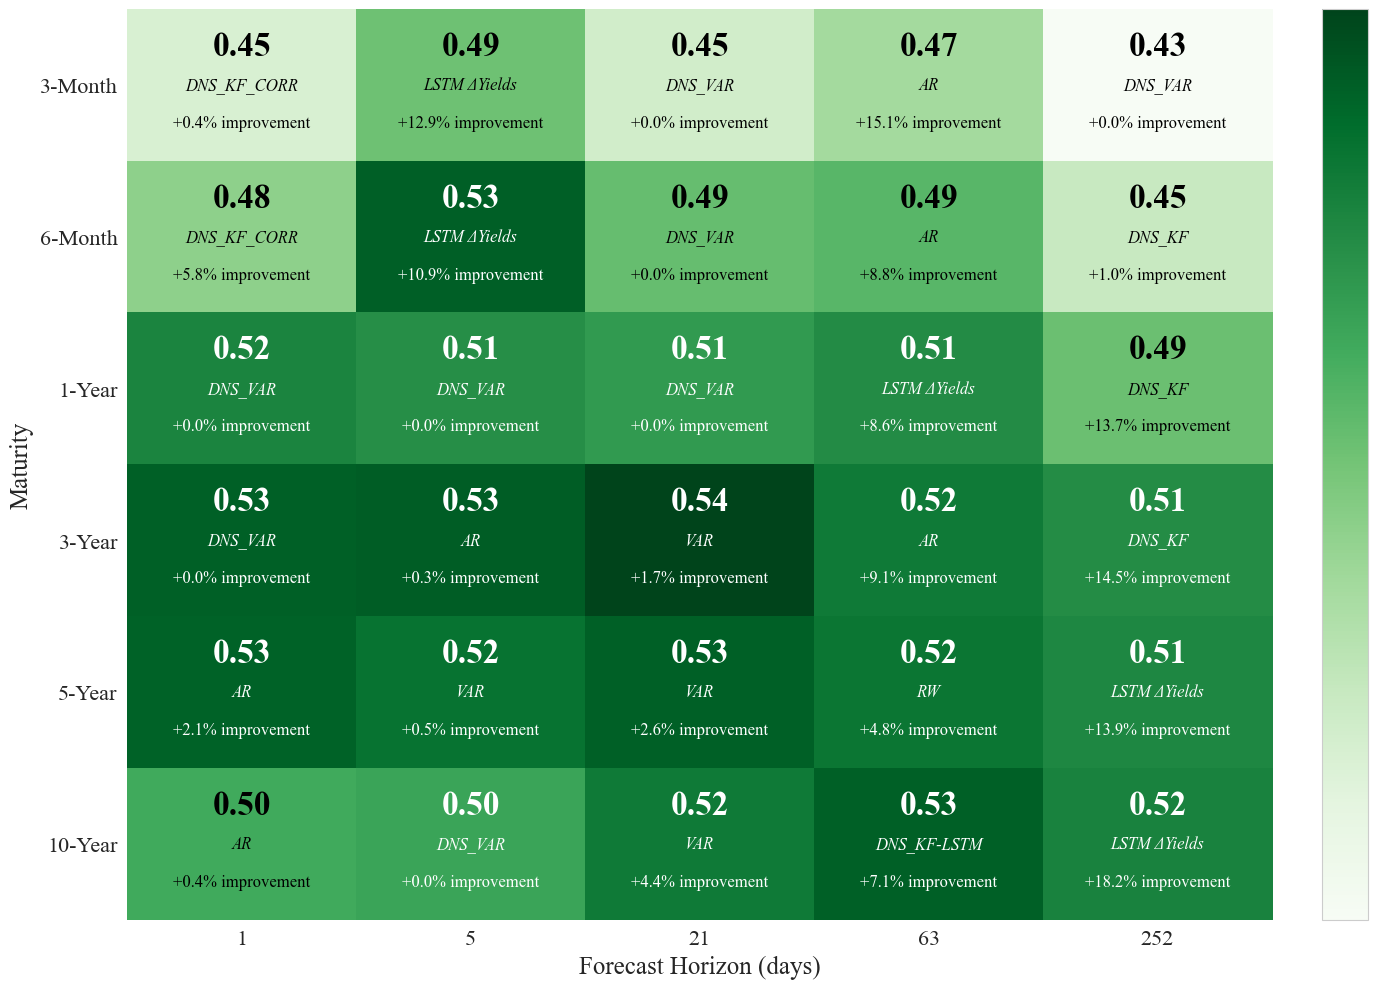

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# ─── Set default font to Times New Roman ──────────────────────────────────────
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

# ─── Strip “_YW” off every model name ────────────────────────────────────────
results_df['Model'] = results_df['Model'].str.replace('_YW', '', regex=False)

# 1) Best-of-model F1 + Model pivots (take idxmax for highest F1)
best_idx_f1    = results_df.groupby(['Horizon','Maturity'])['F1'].idxmax()
best_df_f1     = results_df.loc[best_idx_f1, ['Horizon','Maturity','F1','Model']]
f1_pivot       = best_df_f1.pivot(index='Maturity', columns='Horizon', values='F1').reindex(order)
model_pivot_f1 = best_df_f1.pivot(index='Maturity', columns='Horizon', values='Model').reindex(order)

# 2) Baseline F1 pivot (now just “DNS_VAR”)
baseline_df_f1    = results_df[results_df['Model']=='DNS_VAR']
baseline_pivot_f1 = baseline_df_f1.pivot(index='Maturity', columns='Horizon', values='F1').reindex(order)

# 3) Compute % improvement: (best - baseline) / baseline * 100
improve_f1 = ((f1_pivot - baseline_pivot_f1) / baseline_pivot_f1 * 100).round(1)

# 4) Build RGBA image via Greens over full F1 range
cmap = plt.get_cmap('Greens')
norm = plt.Normalize(f1_pivot.values.min(), f1_pivot.values.max())
rgba = cmap(norm(f1_pivot.values))

# 5) Plot with no grid, no spines, nearest interpolation
fig, ax = plt.subplots(figsize=(14, 10))
ax.imshow(rgba, aspect='auto', interpolation='nearest')
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# 6) Annotate with dynamic font color + 3 lines: F1, model, improvement
def luminance(rgb):
    r, g, b = rgb
    return 0.299*r + 0.587*g + 0.114*b

n_m, n_h = f1_pivot.shape
for i in range(n_m):
    for j in range(n_h):
        f1     = f1_pivot.iat[i, j]
        mdl    = model_pivot_f1.iat[i, j]
        imp    = improve_f1.iat[i, j]
        bg_rgb = rgba[i, j, :3]
        color  = 'white' if luminance(bg_rgb) < 0.5 else 'black'

        # line 1: F1 (bold)
        ax.text(j, i-0.25, f"{f1:.2f}",
                ha='center', va='center',
                fontsize=24, fontweight='bold', color=color)
        # line 2: Model (italic)
        ax.text(j, i, mdl,
                ha='center', va='center',
                fontsize=12, fontstyle='italic', color=color)
        # line 3: improvement
        ax.text(j, i+0.25, f"+{imp:.1f}% improvement",
                ha='center', va='center',
                fontsize=12, color=color)

# 7) Ticks & labels
ax.set_xticks(np.arange(n_h))
ax.set_xticklabels(f1_pivot.columns, fontsize=16)
ax.set_yticks(np.arange(n_m))
ax.set_yticklabels(f1_pivot.index, fontsize=16)
ax.set_xlabel("Forecast Horizon (days)", fontsize=18)
ax.set_ylabel("Maturity", fontsize=18)

# 8) Colorbar without ticks/labels
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),
                    ax=ax, fraction=0.046, pad=0.04)
cbar.ax.set_yticks([])
cbar.ax.set_ylabel("")

plt.tight_layout()
plt.show()


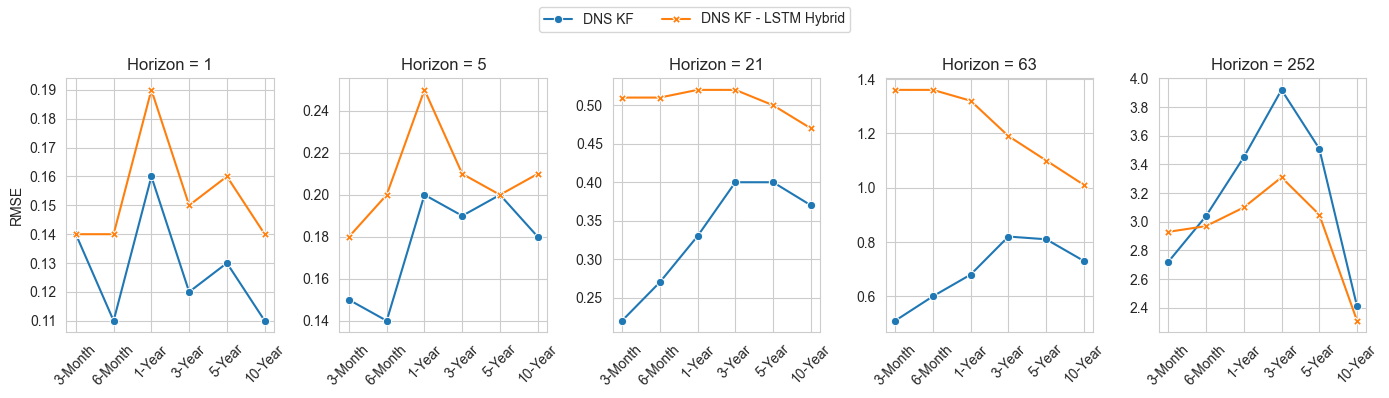

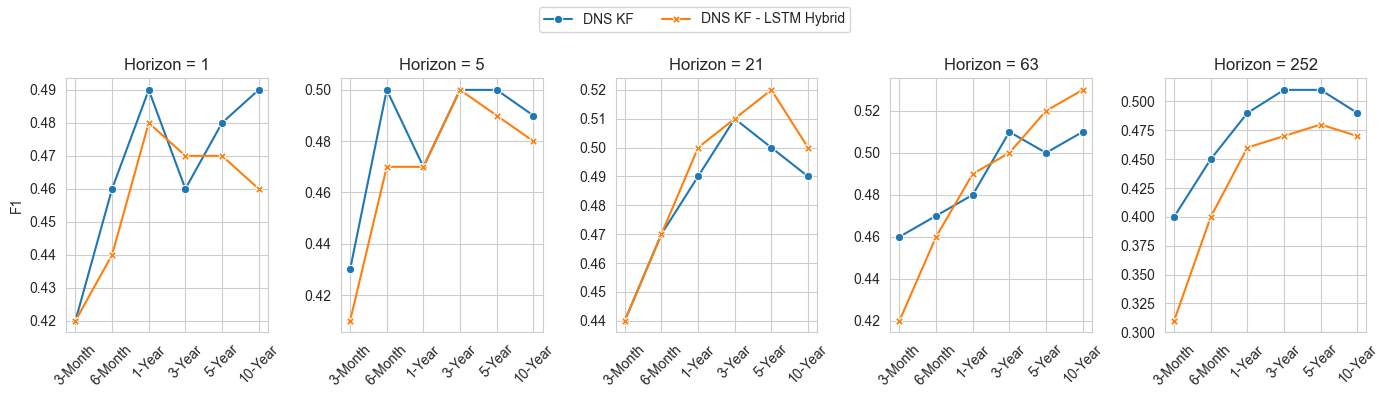

In [57]:
import os
import ast
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, f1_score

# ---------------------- Configuration ----------------------
base_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output"
kf_folder = os.path.join(base_dir, "DNS_KF")
error_folder = os.path.join(base_dir, "LSTM Error Corrector")

# Yield curve maturities in order
torder = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]

# 1. Load DNS_KF forecasts
def load_kf_data(folder):
    data = {}
    for file in glob.glob(os.path.join(folder, "*.csv")):
        df = pd.read_csv(file, parse_dates=["eval_date"]).set_index("eval_date")
        h = int(df["horizon"].iloc[0])
        tr = df["true_yields"].apply(ast.literal_eval).tolist()
        pr = df["forecast_yields"].apply(ast.literal_eval).tolist()
        data[h] = (
            pd.DataFrame(tr, index=df.index, columns=torder),
            pd.DataFrame(pr, index=df.index, columns=torder)
        )
    return data

# 2. Load LSTM-corrector errors
def load_error_data(folder):
    data = {}
    for file in glob.glob(os.path.join(folder, "holdout_forecasts_h*.csv")):
        df = pd.read_csv(file, parse_dates=["eval_date"]).set_index("eval_date")
        h = int(df["horizon"].iloc[0])
        err = df["forecasted_error"]
        if isinstance(err.iloc[0], (float, int, np.floating, np.integer)):
            arr = np.array(err.tolist())
            err_df = pd.DataFrame(
                np.tile(arr.reshape(-1, 1), len(torder)),
                index=err.index, columns=torder
            )
        else:
            lists = err.apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
            err_df = pd.DataFrame(lists.tolist(), index=err.index, columns=torder)
        data[h] = err_df
    return data

kf_data = load_kf_data(kf_folder)
error_data = load_error_data(error_folder)

# 3. Compute metrics per horizon
records = []
for h, (t_df, p_df) in kf_data.items():
    t2, p2 = t_df.align(p_df, join='inner')
    t2, p2 = t2.dropna(how='any'), p2.dropna(how='any')
    td, pdiff = t2.diff().fillna(0)>0, p2.diff().fillna(0)>0
    rmse_kf = [np.sqrt(mean_squared_error(t2[c], p2[c])) for c in torder]
    f1_kf = [f1_score(td[c], pdiff[c]) for c in torder]
    for idx, c in enumerate(torder):
        records.append((h, c, 'KF', rmse_kf[idx], f1_kf[idx]))
    if h in error_data:
        e = error_data[h].reindex(t2.index).ffill().dropna(how='any')
        hybrid = p2.loc[e.index] + e
        td_h = t2.loc[hybrid.index].diff().fillna(0)>0
        ph = hybrid.diff().fillna(0)>0
        rmse_h = [np.sqrt(mean_squared_error(t2.loc[hybrid.index][c], hybrid[c])) for c in torder]
        f1_h = [f1_score(td_h[c], ph[c]) for c in torder]
        for idx, c in enumerate(torder):
            records.append((h, c, 'Hybrid', rmse_h[idx], f1_h[idx]))

# create DataFrame and round metrics to 2 decimals
metrics_df = pd.DataFrame(records, columns=['Horizon','Maturity','Model','RMSE','F1'])
metrics_df[['RMSE','F1']] = metrics_df[['RMSE','F1']].round(2)
# rename model labels for legend
metrics_df['Model'] = metrics_df['Model'].replace({
    'KF': 'DNS KF',
    'Hybrid': 'DNS KF - LSTM Hybrid'
})

# 4. Better Visualization: small multiples of line plots
import seaborn as sns
sns.set_style('whitegrid')
for metric in ['RMSE','F1']:
    fig, axes = plt.subplots(1, len(kf_data), figsize=(14, 4))  # slightly larger subplots
    for idx, (ax, (h, group)) in enumerate(zip(axes, metrics_df.groupby('Horizon'))):
        sns.lineplot(
            data=group,
            x='Maturity', y=metric,
            hue='Model', style='Model',
            markers=True, dashes=False,
            ax=ax
        )
        ax.set_title(f"Horizon = {h}")
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
        # only label y-axis on leftmost subplot
        if idx == 0:
            ax.set_ylabel(metric)
        else:
            ax.set_ylabel('')
        ax.legend().remove()
    # add a shared legend at top
    handles, labels = axes[-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2)
    plt.tight_layout(rect=[0,0,1,0.9])
    plt.show()


In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- assume you already have these from your loop above ---
# true_df, pred_df: DataFrames indexed by date, columns = maturities
# horizon = 1
# model_name = one of model_folders

# pick the horizon and maturity you want
h_sel = 1         # one-day ahead
mat_sel = "3-Month"

# collect error series into a dict
error_dict = {}
for model in model_folders:
    # load and preprocess as you already do...
    folder = os.path.join(base_dir, model)
    # find the CSV for h_sel (you may need to match filename or df["horizon"]==h_sel)
    # here we assume you’ve already built a per-model DataFrame errors_by_model[model]
    # where errors_by_model[model] = pred_df - true_df for H=h_sel
    df_all = pd.read_csv(glob.glob(os.path.join(folder, f"*h{h_sel}_*.csv"))[0])
    df_all["true_yields"] = df_all["true_yields"].apply(ast.literal_eval)
    df_all["forecast_yields"] = df_all["forecast_yields"].apply(ast.literal_eval)
    tdf = pd.DataFrame(df_all["true_yields"].tolist(), columns=keys).rename(columns=maturity_cols)
    pdf = pd.DataFrame(df_all["forecast_yields"].tolist(), columns=keys).rename(columns=maturity_cols)
    # compute the error series for the selected maturity
    errors = (pdf[mat_sel] - tdf[mat_sel]).dropna()
    error_dict[model.replace('_YW','')] = errors

# build long DataFrame
plot_df = pd.concat(
    [pd.DataFrame({"Model": m, "Error": err.values})
       for m, err in error_dict.items()],
    ignore_index=True
)

# plot
plt.figure(figsize=(8,5))
sns.kdeplot(data=plot_df, x="Error", hue="Model", common_norm=False,
            fill=True, alpha=0.3, linewidth=2)
plt.axvline(0, color='k', linestyle='--', linewidth=1)
plt.title(f"One-day Forecast Error Density ({mat_sel})")
plt.xlabel("Forecast Error (bp)")
plt.ylabel("Density")
plt.legend(title="")
plt.show()


IndexError: list index out of range

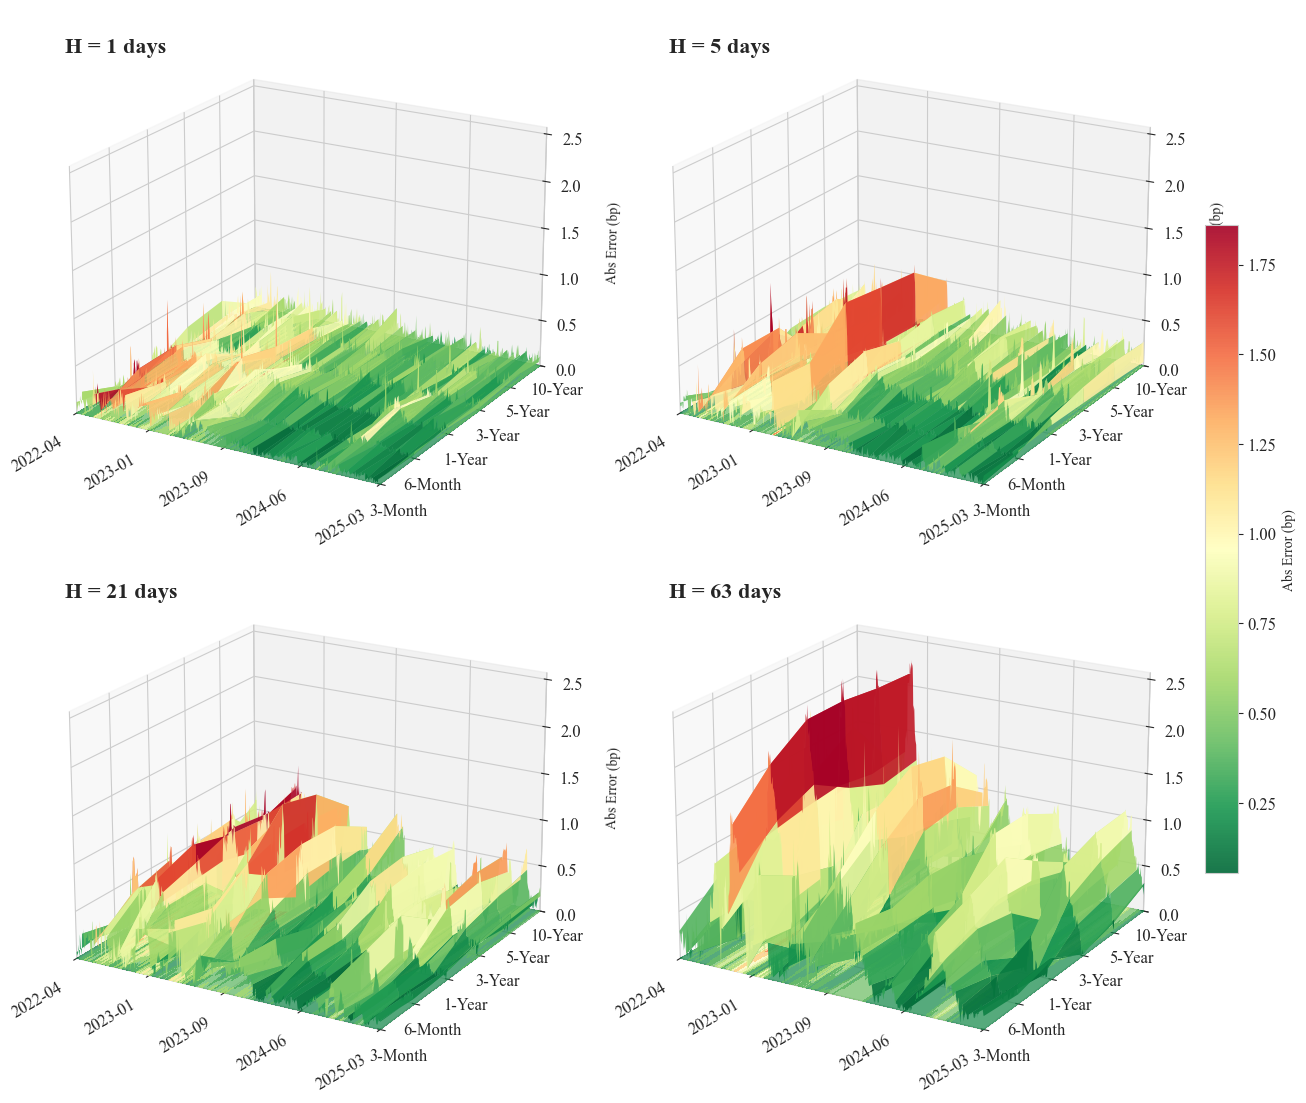

In [129]:
import os, glob, ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates

# ── GLOBAL FONT SETUP ──
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 15,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
})

# ── CONFIG ──
base_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\DNS_KF"
horizons = [1, 5, 21, 63]
keys = ["US_3m","US_6m","US_1y","US_3y","US_5y","US_10y"]
maturity_cols = {
    "US_3m":"3-Month","US_6m":"6-Month","US_1y":"1-Year",
    "US_3y":"3-Year","US_5y":"5-Year","US_10y":"10-Year"
}
order = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]

def load_horizon(h):
    """Load true vs forecast yields for horizon h and return two DataFrames."""
    pattern = os.path.join(base_dir, f"*h{h}*.csv")
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No DNS_KF file for horizon={h} (tried '{pattern}')")
    df = pd.read_csv(files[0], parse_dates=["eval_date"]).set_index("eval_date")
    df["true_yields"]     = df["true_yields"].apply(ast.literal_eval)
    df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)

    tdf = pd.DataFrame(df["true_yields"].tolist(), index=df.index,    columns=keys)
    pdf = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
    tdf.rename(columns=maturity_cols, inplace=True)
    pdf.rename(columns=maturity_cols, inplace=True)
    return tdf[order], pdf[order]

# ── PRE-COMPUTE GLOBAL AXIS LIMITS ──
all_dates = []
all_errors = []
for h in horizons:
    t, p = load_horizon(h)
    err = (p - t).abs()
    all_dates.append(err.index.to_pydatetime())
    all_errors.append(err.values.flatten())

# Flatten and find min/max once
all_dates = np.concatenate(all_dates)
Xmin, Xmax = mdates.date2num(all_dates.min()), mdates.date2num(all_dates.max())

all_errors = np.concatenate(all_errors)
Zmax = np.nanmax(all_errors) * 1.05

# Generate 5 equally-spaced ticks along X
xticks = np.linspace(Xmin, Xmax, 5)

# Y goes from 0 to len(order)-1
Y = np.arange(len(order))

# ── FIGURE SETUP ──
fig = plt.figure(figsize=(16,12))
fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05,
                    wspace=0.02, hspace=0.02)

ELEV, AZIM = 20, -60

for idx, h in enumerate(horizons, start=1):
    true_df, pred_df = load_horizon(h)
    err = (pred_df - true_df).abs()

    dates = err.index.to_pydatetime()
    X = mdates.date2num(dates)
    XX, YY = np.meshgrid(X, Y)
    ZZ = err.T.values

    ax = fig.add_subplot(2, 2, idx, projection='3d')
    ax.view_init(elev=ELEV, azim=AZIM)

    surf = ax.plot_surface(
        XX, YY, ZZ,
        cmap='RdYlGn_r', edgecolor='none', alpha=0.9
    )
    ax.contourf(
        XX, YY, ZZ, zdir='z', offset=0,
        cmap='RdYlGn_r', alpha=0.7
    )

    # Title in the same spot and size each time
    ax.text2D(
        0.05, 0.92, f"H = {h} days",
        transform=ax.transAxes,
        fontweight='bold',
        fontsize=16
    )

    # ── Y-axis: maturities ──
    ax.set_yticks(Y)
    ax.set_yticklabels(order)
    ax.set_ylim(Y.min(), Y.max())

    # ── X-axis: dates ──
    ax.set_xticks(xticks)
    ax.set_xticklabels(
        [mdates.num2date(xi).strftime("%Y-%m") for xi in xticks],
        rotation=30, ha='right'
    )
    ax.set_xlim(Xmin, Xmax)

    # ── Z-axis: absolute error ──
    ax.set_zlim(0, Zmax)
    ax.set_zlabel("Abs Error (bp)", labelpad=10)

# ── Shared colorbar ──
cbar = fig.colorbar(
    surf,
    ax=fig.get_axes(),
    shrink=0.6,
    aspect=20,
    pad=0.02
)
cbar.set_label("Abs Error (bp)")

plt.show()


C:\Users\azorb\AppData\Local\Temp\ipykernel_492828\3958070655.py:102: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


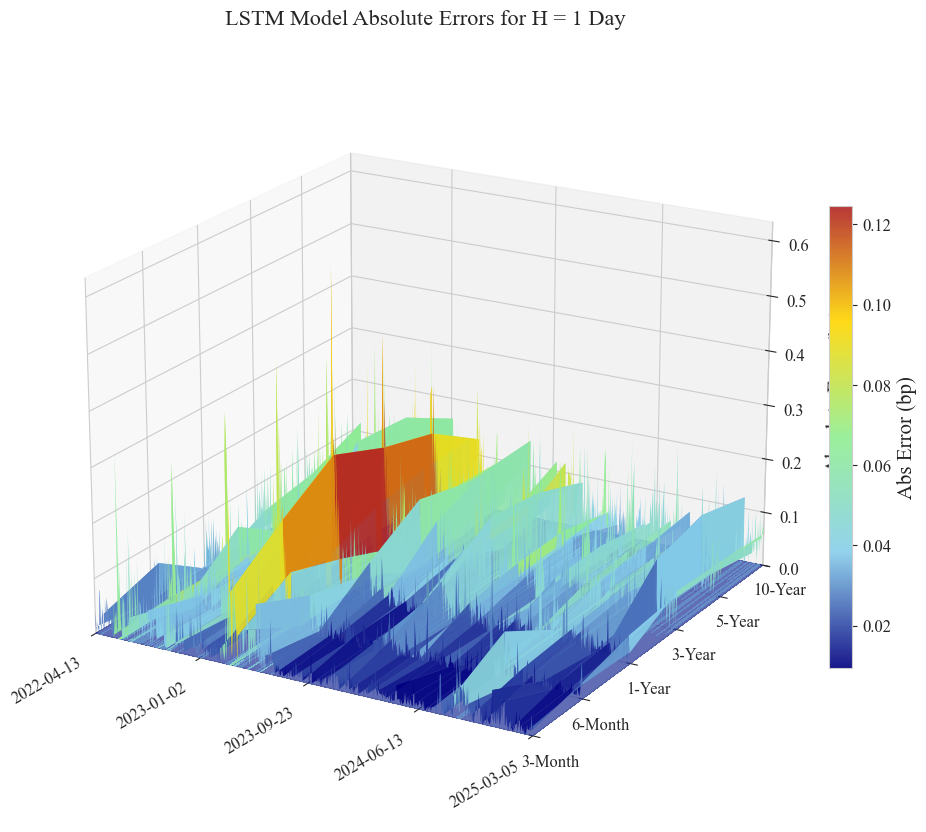

In [76]:
import os, glob, ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap

# ── GLOBAL FONT SETUP ──
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 15,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
})

# ── CONFIG FOR LSTM ──
base_dir = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\LSTM"
horizon = 1
keys = ["US_3m","US_6m","US_1y","US_3y","US_5y","US_10y"]
maturity_cols = {
    "US_3m":"3-Month","US_6m":"6-Month","US_1y":"1-Year",
    "US_3y":"3-Year","US_5y":"5-Year","US_10y":"10-Year"
}
order = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]


def load_horizon(h):
    """Load true vs forecast yields for horizon h and return two DataFrames."""
    pattern = os.path.join(base_dir, f"*h{h}*.csv")
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No LSTM file for horizon={h} (tried '{pattern}')")
    df = pd.read_csv(files[0], parse_dates=["eval_date"]).set_index("eval_date")
    df["true_yields"]     = df["true_yields"].apply(ast.literal_eval)
    df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)

    tdf = pd.DataFrame(df["true_yields"].tolist(), index=df.index,    columns=keys)
    pdf = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
    tdf.rename(columns=maturity_cols, inplace=True)
    pdf.rename(columns=maturity_cols, inplace=True)
    return tdf[order], pdf[order]

# ── LOAD DATA AND COMPUTE ERRORS ──
true_df, pred_df = load_horizon(horizon)
err = (pred_df - true_df).abs()

dates = err.index.to_pydatetime()
Xnums = mdates.date2num(dates)
Y = np.arange(len(order))
XX, YY = np.meshgrid(Xnums, Y)
ZZ = err.T.values

# ── AXIS LIMITS ──
Xmin, Xmax = Xnums.min(), Xnums.max()
Zmax = err.values.max() * 1.05
xticks = np.linspace(Xmin, Xmax, 5)

# ── CUSTOM COLORMAP ──
custom_cmap = LinearSegmentedColormap.from_list(
    'custom_cmap', ['navy', 'skyblue', 'lightgreen', 'gold', 'firebrick']
)

# ── PLOT ──
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=20, azim=-60)

surf = ax.plot_surface(
    XX, YY, ZZ,
    cmap=custom_cmap, edgecolor='none', alpha=0.9
)
ax.contourf(
    XX, YY, ZZ, zdir='z', offset=0,
    cmap=custom_cmap, alpha=0.7
)

# ── AXIS LABELS & TICKS ──
ax.set_yticks(Y)
ax.set_yticklabels(order)
ax.set_ylim(Y.min(), Y.max())

ax.set_xticks(xticks)
ax.set_xticklabels(
    [mdates.num2date(xi).strftime("%Y-%m-%d") for xi in xticks],
    rotation=30, ha='right'
)
ax.set_xlim(Xmin, Xmax)
ax.set_zlim(0, Zmax)

ax.set_zlabel('Absolute Error (bp)', labelpad=10)
ax.set_title(f"LSTM Model Absolute Errors for H = {horizon} Day", pad=20)

# ── COLORBAR ──
cbar = fig.colorbar(
    surf, shrink=0.6, aspect=20, pad=0.02
)
cbar.set_label("Abs Error (bp)")

plt.tight_layout()
plt.show()


C:\Users\azorb\AppData\Local\Temp\ipykernel_492828\2599203326.py:119: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


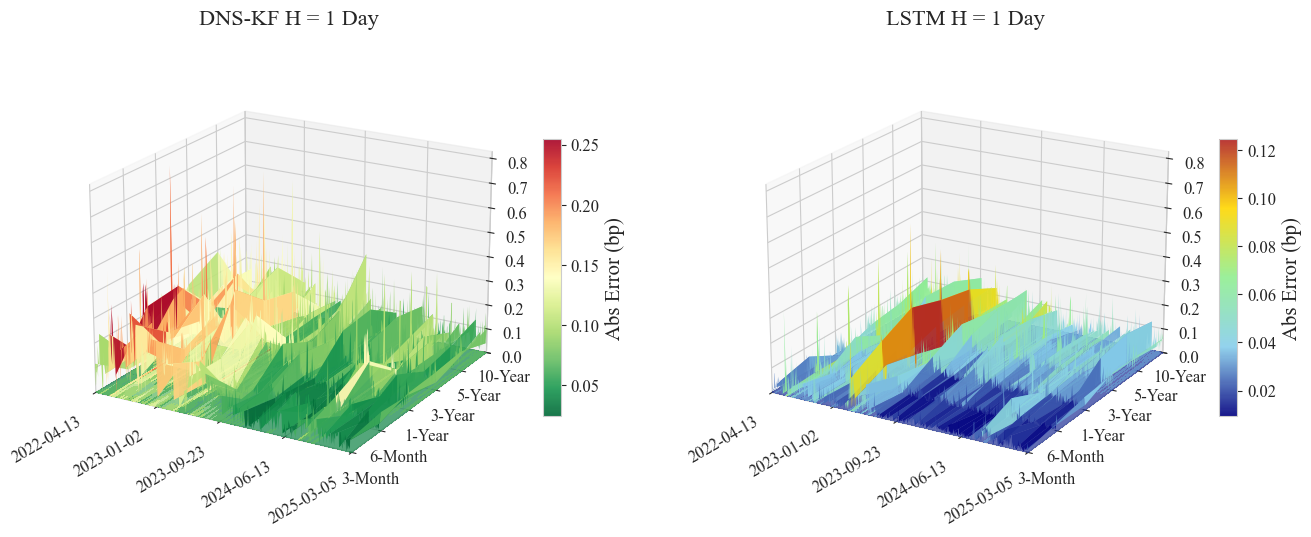

In [89]:
import os, glob, ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap

# ── GLOBAL FONT SETUP ──
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 15,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
})

# ── CONFIG ──
keys = ["US_3m","US_6m","US_1y","US_3y","US_5y","US_10y"]
maturity_cols = {
    "US_3m":"3-Month","US_6m":"6-Month","US_1y":"1-Year",
    "US_3y":"3-Year","US_5y":"5-Year","US_10y":"10-Year"
}
order = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]
horizon = 1

base_dir_dns  = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\DNS_KF"
base_dir_lstm = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\LSTM"

# ── LOAD FUNCTIONS ──
def load_horizon_dns(h):
    pattern = os.path.join(base_dir_dns, f"*h{h}*.csv")
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No DNS_KF file for horizon={h}")
    df = pd.read_csv(files[0], parse_dates=["eval_date"]).set_index("eval_date")
    df["true_yields"]     = df["true_yields"].apply(ast.literal_eval)
    df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)
    tdf = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
    pdf = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
    tdf.rename(columns=maturity_cols, inplace=True)
    pdf.rename(columns=maturity_cols, inplace=True)
    return tdf[order], pdf[order]


def load_horizon_lstm(h):
    pattern = os.path.join(base_dir_lstm, f"*h{h}*.csv")
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No LSTM file for horizon={h}")
    df = pd.read_csv(files[0], parse_dates=["eval_date"]).set_index("eval_date")
    df["true_yields"]     = df["true_yields"].apply(ast.literal_eval)
    df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)
    tdf = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
    pdf = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
    tdf.rename(columns=maturity_cols, inplace=True)
    pdf.rename(columns=maturity_cols, inplace=True)
    return tdf[order], pdf[order]

# ── LOAD DATA & ERRORS ──
t_true, p_true = load_horizon_dns(horizon)
err_dns  = (p_true - t_true).abs()
t_lstm, p_lstm = load_horizon_lstm(horizon)
err_lstm = (p_lstm - t_lstm).abs()

# ── GRID PREP ──
dates_dns  = err_dns.index.to_pydatetime()
dates_lstm = err_lstm.index.to_pydatetime()
X_dns  = mdates.date2num(dates_dns)
X_lstm = mdates.date2num(dates_lstm)
Y = np.arange(len(order))
XX_dns, YY_dns   = np.meshgrid(X_dns, Y)
XX_lstm, YY_lstm = np.meshgrid(X_lstm, Y)
ZZ_dns   = err_dns.T.values
ZZ_lstm  = err_lstm.T.values

# ── SHARED X-AXIS LIMITS & TICKS ──
Xmin = min(X_dns.min(), X_lstm.min())
Xmax = max(X_dns.max(), X_lstm.max())
xticks = np.linspace(Xmin, Xmax, 5)

# ── COLORMAPS ──
map_dns  = 'RdYlGn_r'
map_lstm = LinearSegmentedColormap.from_list('custom', ['navy','skyblue','lightgreen','gold','firebrick'])

# ── PLOT ──
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for ax, XX, YY, ZZ, cmap, title in [
    (ax1, XX_dns, YY_dns, ZZ_dns, map_dns,  'DNS-KF H = 1 Day'),
    (ax2, XX_lstm, YY_lstm, ZZ_lstm, map_lstm, 'LSTM H = 1 Day')
]:
    # … your plotting calls …

    # set title in the usual way (pad is a no‐op on 3D)
    t = ax.set_title(title, fontweight='bold')

    # now pull it down by adjusting the title's y‐coordinate:
    # try values between ~0.9 (lower) and 1.1 (higher) until it's placed exactly where you want
    t.set_y(0.6)

    ax.view_init(elev=20, azim=-60)
    surf = ax.plot_surface(XX, YY, ZZ, cmap=cmap, edgecolor='none', alpha=0.9)
    ax.contourf(XX, YY, ZZ, zdir='z', offset=0, cmap=cmap, alpha=0.7)
    ax.set_yticks(Y)
    ax.set_yticklabels(order)
    ax.set_ylim(Y.min(), Y.max())
    ax.set_xticks(xticks)
    ax.set_xticklabels([mdates.num2date(x).strftime('%Y-%m-%d') for x in xticks], rotation=30, ha='right')
    ax.set_xlim(Xmin, Xmax)
    ax.set_zlim(0, max(err_dns.values.max(), err_lstm.values.max()) * 1.05)
    ax.set_title(title, pad=20)
    # individual colorbars
    fig.colorbar(surf, ax=ax, shrink=0.6, aspect=15, pad=0.05).set_label('Abs Error (bp)')

plt.tight_layout()
plt.show()


C:\Users\azorb\AppData\Local\Temp\ipykernel_492828\228336370.py:111: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


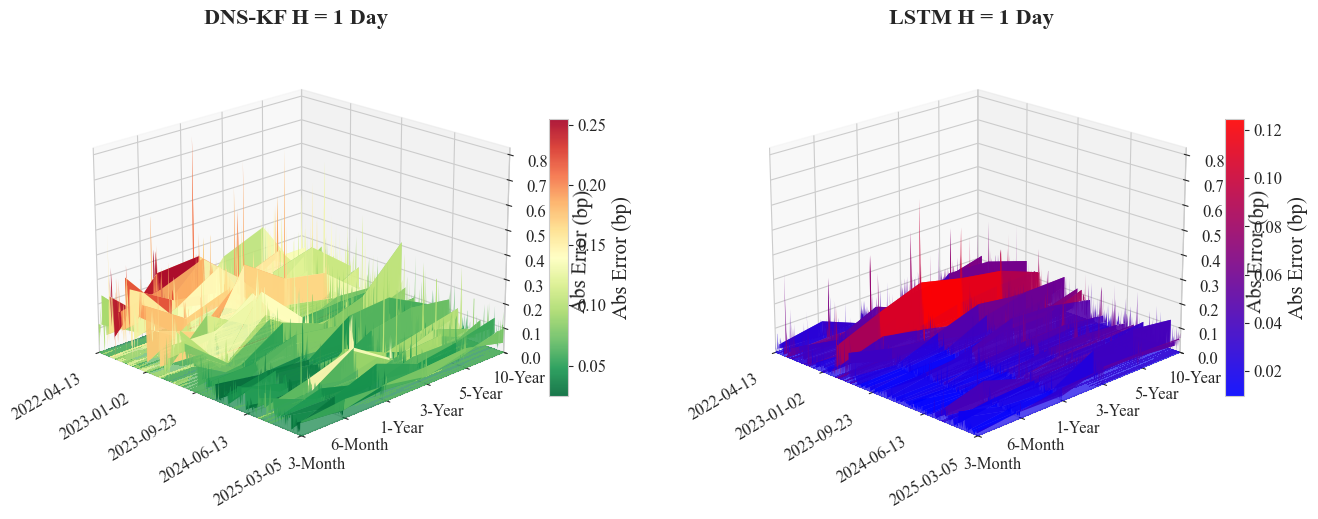

In [97]:
import os, glob, ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap

# ── GLOBAL FONT SETUP ──
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 15,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlesize': 16,
})

# ── CONFIG ──
keys = ["US_3m","US_6m","US_1y","US_3y","US_5y","US_10y"]
maturity_cols = {
    "US_3m":"3-Month","US_6m":"6-Month","US_1y":"1-Year",
    "US_3y":"3-Year","US_5y":"5-Year","US_10y":"10-Year"
}
order = ["3-Month","6-Month","1-Year","3-Year","5-Year","10-Year"]
horizon = 1

base_dir_dns  = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\DNS_KF"
base_dir_lstm = r"C:\Users\azorb\PycharmProjects\Predicting the Yield Curve\Model Fit\Output\LSTM"

# ── LOAD FUNCTIONS ──
def load_horizon_dns(h):
    pattern = os.path.join(base_dir_dns, f"*h{h}*.csv")
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No DNS_KF file for horizon={h}")
    df = pd.read_csv(files[0], parse_dates=["eval_date"]).set_index("eval_date")
    df["true_yields"]     = df["true_yields"].apply(ast.literal_eval)
    df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)
    tdf = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
    pdf = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
    tdf.rename(columns=maturity_cols, inplace=True)
    pdf.rename(columns=maturity_cols, inplace=True)
    return tdf[order], pdf[order]

def load_horizon_lstm(h):
    pattern = os.path.join(base_dir_lstm, f"*h{h}*.csv")
    files = glob.glob(pattern)
    if not files:
        raise FileNotFoundError(f"No LSTM file for horizon={h}")
    df = pd.read_csv(files[0], parse_dates=["eval_date"]).set_index("eval_date")
    df["true_yields"]     = df["true_yields"].apply(ast.literal_eval)
    df["forecast_yields"] = df["forecast_yields"].apply(ast.literal_eval)
    tdf = pd.DataFrame(df["true_yields"].tolist(), index=df.index, columns=keys)
    pdf = pd.DataFrame(df["forecast_yields"].tolist(), index=df.index, columns=keys)
    tdf.rename(columns=maturity_cols, inplace=True)
    pdf.rename(columns=maturity_cols, inplace=True)
    return tdf[order], pdf[order]

# ── LOAD DATA & ERRORS ──
t_true, p_true = load_horizon_dns(horizon)
err_dns  = (p_true - t_true).abs()
t_lstm, p_lstm = load_horizon_lstm(horizon)
err_lstm = (p_lstm - t_lstm).abs()

# ── GRID PREP ──
dates_dns  = err_dns.index.to_pydatetime()
dates_lstm = err_lstm.index.to_pydatetime()
X_dns  = mdates.date2num(dates_dns)
X_lstm = mdates.date2num(dates_lstm)
Y = np.arange(len(order))
XX_dns, YY_dns   = np.meshgrid(X_dns, Y)
XX_lstm, YY_lstm = np.meshgrid(X_lstm, Y)
ZZ_dns   = err_dns.T.values
ZZ_lstm  = err_lstm.T.values

# ── SHARED X-AXIS LIMITS & TICKS ──
Xmin = min(X_dns.min(), X_lstm.min())
Xmax = max(X_dns.max(), X_lstm.max())
xticks = np.linspace(Xmin, Xmax, 5)

# ── COLORMAPS ──
map_dns  = 'RdYlGn_r'
map_lstm = LinearSegmentedColormap.from_list('blue_red', ['blue','red'])

# ── PLOT ──
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

for ax, XX, YY, ZZ, cmap, title in [
    (ax1, XX_dns, YY_dns, ZZ_dns, map_dns,  'DNS-KF H = 1 Day'),
    (ax2, XX_lstm, YY_lstm, ZZ_lstm, map_lstm, 'LSTM H = 1 Day')
]:
    ax.view_init(elev=20, azim=-45)
    surf = ax.plot_surface(XX, YY, ZZ, cmap=cmap, edgecolor='none', alpha=0.9)
    ax.contourf(XX, YY, ZZ, zdir='z', offset=0, cmap=cmap, alpha=0.7)
    ax.set_yticks(Y)
    ax.set_yticklabels(order)
    ax.set_ylim(Y.min(), Y.max())
    ax.set_xticks(xticks)
    ax.set_xticklabels([mdates.num2date(x).strftime('%Y-%m-%d') for x in xticks], rotation=30, ha='right')
    ax.set_xlim(Xmin, Xmax)
    ax.set_zlim(0, max(err_dns.values.max(), err_lstm.values.max()) * 1.05)
    ax.set_zlabel('Abs Error (bp)', labelpad=10)
    # place title and manually adjust its vertical position:
    t = ax.set_title(title, fontweight='bold')
    t.set_y(0.94)  # try 0.94; lower values move title closer into plot
    fig.colorbar(surf, ax=ax, shrink=0.6, aspect=15, pad=0.05).set_label('Abs Error (bp)')

plt.tight_layout()
plt.show()